In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import os

dataframes = []

# Full path to your folder
base_dir = r"C:\Users\mmadh\Downloads\hospitality_data"

for year in [2022, 2023, 2024, 2025]:
    year_path = os.path.join(base_dir, str(year))

    df_1 = pd.read_csv(os.path.join(year_path, "HCAHPS-Hospital.csv"), encoding='latin1', dtype={'Facility ID': str})
    df_2 = pd.read_csv(os.path.join(year_path, "Hospital_General_Information.csv"), encoding='latin1', dtype={'Facility ID': str})
    df_3 = pd.read_csv(os.path.join(year_path, "OQR_OAS_CAHPS_BY_HOSPITAL.csv"), encoding='latin1', dtype={'Facility ID': str})
    df_4 = pd.read_csv(os.path.join(year_path, "PCH_HCAHPS_HOSPITAL.csv"), encoding='latin1', dtype={'Facility ID': str})

    # Merge dataframes with suffixes
    main_df = pd.merge(df_1, df_2, how='inner', on='Facility ID', suffixes=('', '_df2'))
    main_df = pd.merge(main_df, df_3, how='left', on='Facility ID', suffixes=('', '_df3'))
    main_df = pd.merge(main_df, df_4, how='left', on='Facility ID', suffixes=('', '_df4'))

    main_df['Year'] = year
    dataframes.append(main_df)


C:\Users\mmadh\AppData\Local\Temp\ipykernel_28244\2542697843.py:12: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv(os.path.join(year_path, "HCAHPS-Hospital.csv"), encoding='latin1', dtype={'Facility ID': str})
C:\Users\mmadh\AppData\Local\Temp\ipykernel_28244\2542697843.py:12: DtypeWarning: Columns (12,14,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv(os.path.join(year_path, "HCAHPS-Hospital.csv"), encoding='latin1', dtype={'Facility ID': str})
C:\Users\mmadh\AppData\Local\Temp\ipykernel_28244\2542697843.py:12: DtypeWarning: Columns (12,14,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv(os.path.join(year_path, "HCAHPS-Hospital.csv"), encoding='latin1', dtype={'Facility ID': str})
C:\Users\mmadh\AppData\Local\Temp\ipykernel_28244\2542697843.py:12: DtypeWarning: Columns (12,14,17,19) have mixed types. Speci

In [3]:
yr2022_df = dataframes[0]
yr2023_df = dataframes[1]
yr2024_df = dataframes[2]
yr2025_df = dataframes[3]

In [4]:
yr2022_df

Facility ID                     Facility Name  \
0           010001   SOUTHEAST HEALTH MEDICAL CENTER   
1           010001   SOUTHEAST HEALTH MEDICAL CENTER   
2           010001   SOUTHEAST HEALTH MEDICAL CENTER   
3           010001   SOUTHEAST HEALTH MEDICAL CENTER   
4           010001   SOUTHEAST HEALTH MEDICAL CENTER   
...            ...                               ...   
437839      670314  ST MICHAELS MEDICAL HOSPITAL LLC   
437840      670314  ST MICHAELS MEDICAL HOSPITAL LLC   
437841      670314  ST MICHAELS MEDICAL HOSPITAL LLC   
437842      670314  ST MICHAELS MEDICAL HOSPITAL LLC   
437843      670314  ST MICHAELS MEDICAL HOSPITAL LLC   

                                   Address        City State  ZIP Code  \
0                   1108 ROSS CLARK CIRCLE      DOTHAN    AL     36301   
1                   1108 ROSS CLARK CIRCLE      DOTHAN    AL     36301   
2                   1108 ROSS CLARK CIRCLE      DOTHAN    AL     36301   
3                   1108 ROSS CLARK CIRCLE      DOTHAN    AL     36301   
4                   1108 ROSS CLARK CIRCLE      DOTHAN    AL     36301   
...                                    ...         ...   ...       ...   
437839  16000 SOUTHWEST FREEWAY, SUITE 100  SUGAR LAND    TX     77479   
437840  16000 SOUTHWEST FREEWAY, SUITE 100  SUGAR LAND    TX     77479   
437841  16000 SOUTHWEST FREEWAY, SUITE 100  SUGAR LAND    TX     77479   
437842  16000 SOUTHWEST FREEWAY, SUITE 100  SUGAR LAND    TX     77479   
437843  16000 SOUTHWEST FREEWAY, SUITE 100  SUGAR LAND    TX     77479   

       County Name    Phone Number      HCAHPS Measure ID  \
0          HOUSTON  (334) 793-8701           H_COMP_1_A_P   
1          HOUSTON  (334) 793-8701          H_COMP_1_SN_P   
2          HOUSTON  (334) 793-8701           H_COMP_1_U_P   
3          HOUSTON  (334) 793-8701  H_COMP_1_LINEAR_SCORE   
4          HOUSTON  (334) 793-8701   H_COMP_1_STAR_RATING   
...            ...             ...                    ...   
437839   FORT BEND  (281) 980-4357            H_RECMND_DY   
437840   FORT BEND  (281) 980-4357            H_RECMND_PY   
437841   FORT BEND  (281) 980-4357  H_RECMND_LINEAR_SCORE   
437842   FORT BEND  (281) 980-4357   H_RECMND_STAR_RATING   
437843   FORT BEND  (281) 980-4357          H_STAR_RATING   

                                          HCAHPS Question  ...  \
0       Patients who reported that their nurses "Alway...  ...   
1       Patients who reported that their nurses "Somet...  ...   
2       Patients who reported that their nurses "Usual...  ...   
3                 Nurse communication - linear mean score  ...   
4                       Nurse communication - star rating  ...   
...                                                   ...  ...   
437839  Patients who reported YES, they would definite...  ...   
437840  Patients who reported YES, they would probably...  ...   
437841             Recommend hospital - linear mean score  ...   
437842                   Recommend hospital - star rating  ...   
437843                                Summary star rating  ...   

       HCAHPS Answer Percent_df4 HCAHPS Answer Percent Footnote_df4  \
0                            NaN                                NaN   
1                            NaN                                NaN   
2                            NaN                                NaN   
3                            NaN                                NaN   
4                            NaN                                NaN   
...                          ...                                ...   
437839                       NaN                                NaN   
437840                       NaN                                NaN   
437841                       NaN                                NaN   
437842                       NaN                                NaN   
437843                       NaN                                NaN   

       HCAHPS Linear Mean Value_df4 Number of Completed Surveys_df

In [5]:
# Remove duplicate columns
def remove_duplicate_columns(df):
    return df[[col for col in df.columns if not col.endswith(('_df2', '_df3', '_df4'))]]

yr2022_df = remove_duplicate_columns(yr2022_df)
yr2023_df = remove_duplicate_columns(yr2023_df)
yr2024_df = remove_duplicate_columns(yr2024_df)
yr2025_df = remove_duplicate_columns(yr2025_df)

| Column Name | Description |
|-------------|-------------|
| Facility ID | Unique identifier for the healthcare facility. |
| Facility Name | Official name of the healthcare facility. |
| Address | Street address of the facility. |
| City | City where the facility is located. |
| State | U.S. state where the facility is located. |
| ZIP Code | ZIP code of the facility. |
| County Name | Name of the county the facility is located in. |
| Phone Number | Facility’s contact phone number. |
| HCAHPS Measure ID | ID of the specific HCAHPS (patient experience) survey measure. |
| HCAHPS Question | Survey question asked to patients. |
| HCAHPS Answer Description | Description of the answer option provided. |
| Patient Survey Star Rating | Star rating (1–5) based on patient responses. |
| Patient Survey Star Rating Footnote | Additional explanation or clarification on the star rating. |
| HCAHPS Answer Percent | Percent of patients selecting a particular survey response. |
| HCAHPS Answer Percent Footnote | Notes on how the percentage was calculated or qualified. |
| HCAHPS Linear Mean Value | Average score from survey responses on a linear scale. |
| Number of Completed Surveys | Count of completed patient experience surveys. |
| Number of Completed Surveys Footnote | Additional notes or caveats on the survey count. |
| Survey Response Rate Percent | Percentage of patients who responded to the survey. |
| Survey Response Rate Percent Footnote | Notes on the response rate calculation. |
| Start Date | Start of the data collection period. |
| End Date | End of the data collection period. |
| Hospital Type | Type of hospital (e.g., acute care, critical access). |
| Hospital Ownership | Entity that owns the hospital (e.g., government, private). |
| Emergency Services | Indicates if the facility offers emergency services. |
| Meets criteria for promoting interoperability of EHRs | Whether facility meets federal EHR use standards. |
| Hospital overall rating | Overall CMS quality rating (1–5 stars). |
| Hospital overall rating footnote | Additional information or context for the rating. |
| MORT Group Measure Count | Number of mortality-related quality measures. |
| Count of Facility MORT Measures | Facility-specific mortality measures reported. |
| Count of MORT Measures Better | Measures where the facility performed better than national average. |
| Count of MORT Measures No Different | Measures where performance was similar to the national average. |
| Count of MORT Measures Worse | Measures where the facility performed worse than average. |
| MORT Group Footnote | Notes on mortality measure reporting. |
| Safety Group Measure Count | Number of safety-related quality measures. |
| Count of Facility Safety Measures | Count of safety metrics reported by the facility. |
| Count of Safety Measures Better | Measures where safety outcomes were better than average. |
| Count of Safety Measures No Different | Safety measures where performance was typical. |
| Count of Safety Measures Worse | Measures where safety performance was worse than average. |
| Safety Group Footnote | Notes on safety measure data. |
| READM Group Measure Count | Number of readmission-related measures. |
| Count of Facility READM Measures | Facility-specific readmission measures. |
| Count of READM Measures Better | Measures with better-than-average readmission rates. |
| Count of READM Measures No Different | Readmission performance comparable to average. |
| Count of READM Measures Worse | Measures with worse-than-average readmission rates. |
| READM Group Footnote | Notes about readmission data. |
| Pt Exp Group Measure Count | Number of patient experience-related measures. |
| Count of Facility Pt Exp Measures | Facility-specific patient experience measures. |
| Pt Exp Group Footnote | Additional details on patient experience group. |
| TE Group Measure Count | Count of timely and effective care measures. |
| Count of Facility TE Measures | Number of such measures reported by the facility. |
| TE Group Footnote | Notes about the timely and effective care group. |
| County | County of the facility (may duplicate “County Name”). |
| Telephone | Alternate field for the facility’s phone number. |
| Patients who reported that staff definitely gave care... | % of patients reporting staff were professional and facility was clean. |
| Patients who reported that staff somewhat gave care... | % reporting moderately professional care or cleanliness. |
| Patients who reported that staff did not give care... | % reporting unprofessional care or poor cleanliness. |
| Facilities and staff linear mean score | Average score reflecting staff professionalism and cleanliness. |
| Patients who reported that staff definitely communicated... | % reporting clear communication before/after procedure. |
| Patients who reported that staff somewhat communicated... | % reporting partial or moderate communication. |
| Patients who reported that staff did not communicate... | % reporting no or poor communication. |
| Communication about your procedure linear mean score | Mean score of patient-reported communication. |
| Patients who gave the facility a rating of 9 or 10... | % giving high overall facility ratings. |
| Patients who gave the facility a rating of 7 or 8... | % giving moderate ratings. |
| Patients who gave the facility a rating of 0 to 6... | % giving poor overall ratings. |
| Patients’ rating of the facility linear mean score | Average facility rating across all patients. |
| Patients who reported YES they would DEFINITELY recommend... | % of patients who would definitely recommend the facility. |
| Patients who reported PROBABLY YES they would recommend... | % who would probably recommend. |
| Patients who reported NO, they would not recommend... | % who would not recommend the facility. |
| Patients recommending the facility linear mean score | Average score of patient recommendations. |
| Footnote | General notes or clarifications related to data. |
| Number of Sampled Patients | Total number of patients selected to complete the survey. |


In [6]:
yr2022_df.columns.to_list()

['Facility ID',
 'Facility Name',
 'Address',
 'City',
 'State',
 'ZIP Code',
 'County Name',
 'Phone Number',
 'HCAHPS Measure ID',
 'HCAHPS Question',
 'HCAHPS Answer Description',
 'Patient Survey Star Rating',
 'Patient Survey Star Rating Footnote',
 'HCAHPS Answer Percent',
 'HCAHPS Answer Percent Footnote',
 'HCAHPS Linear Mean Value',
 'Number of Completed Surveys',
 'Number of Completed Surveys Footnote',
 'Survey Response Rate Percent',
 'Survey Response Rate Percent Footnote',
 'Start Date',
 'End Date',
 'Hospital Type',
 'Hospital Ownership',
 'Emergency Services',
 'Meets criteria for promoting interoperability of EHRs',
 'Hospital overall rating',
 'Hospital overall rating footnote',
 'MORT Group Measure Count',
 'Count of Facility MORT Measures',
 'Count of MORT Measures Better',
 'Count of MORT Measures No Different',
 'Count of MORT Measures Worse',
 'MORT Group Footnote',
 'Safety Group Measure Count',
 'Count of Facility Safety Measures',
 'Count of Safety Measures B

In [7]:
# List of relevant satisfaction-related columns (use exact column names as in your DataFrame)
satisfaction_columns = [
    'Patient Survey Star Rating',
    'Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)',
    'Patients who reported YES they would DEFINITELY recommend the facility to family or friends',
    'Patients recommending the facility linear mean score'
]

# Replace 'Not applicable' with np.nan for all four dataframes
for df in [yr2022_df, yr2023_df, yr2024_df, yr2025_df]:
    df[satisfaction_columns] = df[satisfaction_columns].replace(['Not Applicable', 'Not Available'], np.nan).astype(np.float64)

C:\Users\mmadh\AppData\Local\Temp\ipykernel_28244\3367849222.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[satisfaction_columns] = df[satisfaction_columns].replace(['Not Applicable', 'Not Available'], np.nan).astype(np.float64)
C:\Users\mmadh\AppData\Local\Temp\ipykernel_28244\3367849222.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[satisfaction_columns] = df[satisfaction_columns].replace(['Not Applicable', 'Not Available'], np.nan).astype(np.float64)
C:\Users\mmadh\AppData\Local\Temp\ip

In [8]:
yr2022_df['Patient Survey Star Rating'].unique()

array([nan,  3.,  2.,  4.,  1.,  5.])

In [9]:
yr2022_df['HCAHPS Linear Mean Value'].unique()

array(['Not Applicable', '90', '91', '80', '77', '88', '82', '85', '86',
       '92', '75', '81', '84', '87', '89', '73', '70', '94', '83',
       'Not Available', '78', '71', '74', '79', '76', '93', '95', '96',
       '69', '72', '65', '68', '67', '97', '63', '66', '98', '62', '60',
       '64', '58', '50', '61', '59', '44', '53', '57', '55', '43', '56',
       '99', '100'], dtype=object)

C:\Users\mmadh\AppData\Local\Temp\ipykernel_28244\1283792345.py:24: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
c:\Users\mmadh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


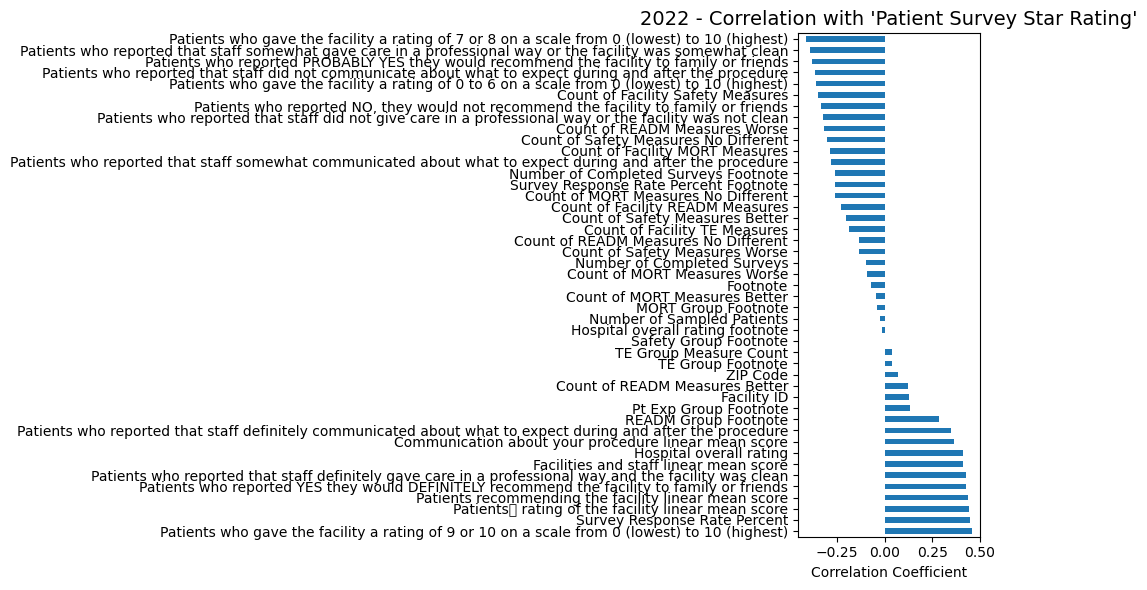

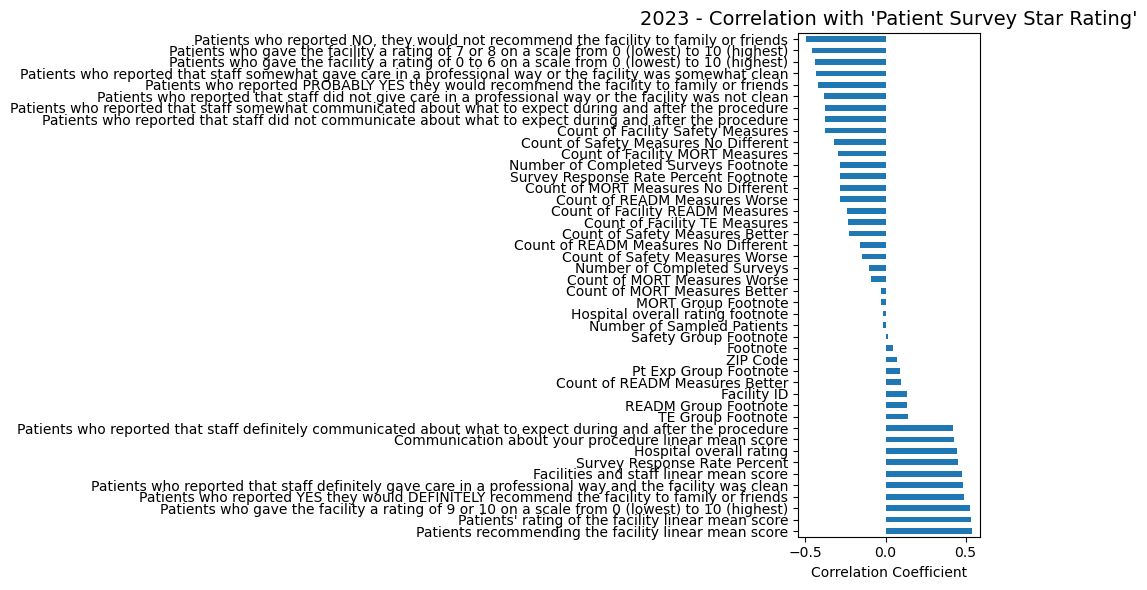

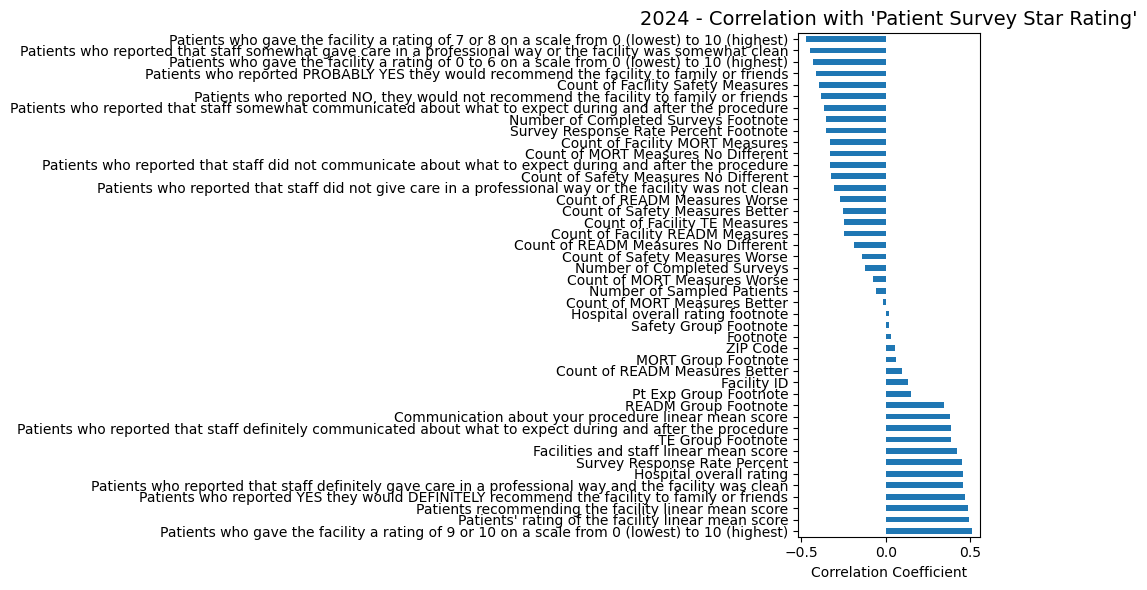

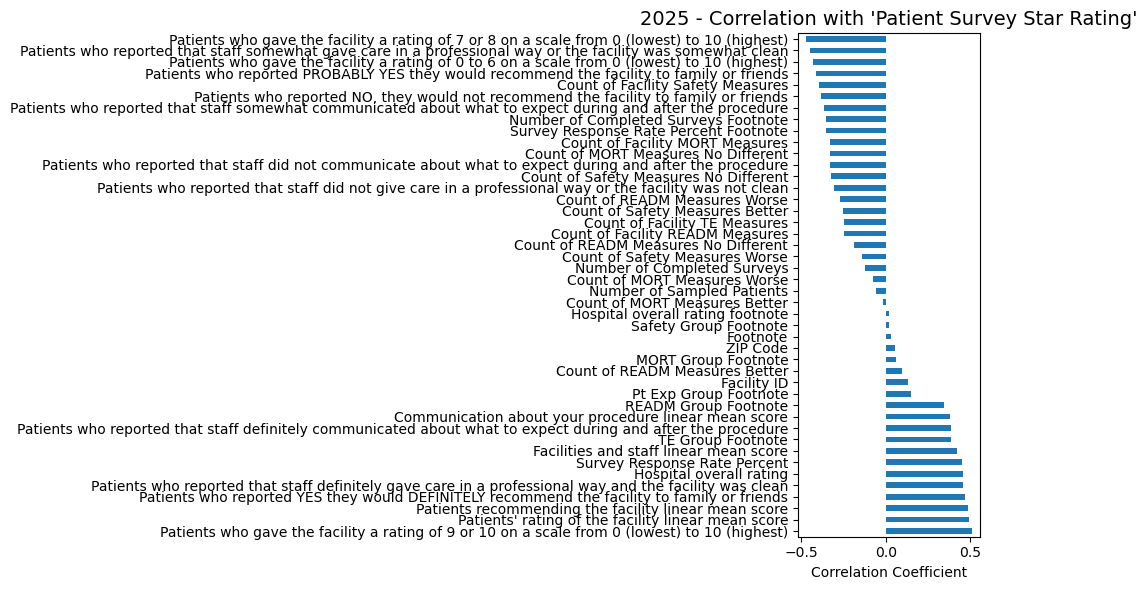

In [10]:
yearly_dfs = {2022: yr2022_df, 2023: yr2023_df, 2024: yr2024_df, 2025: yr2025_df}

# Define the target columns related to patient satisfaction
target_columns = [
    'Patient Survey Star Rating',
]

# Function to compute correlation with target columns for a given year
def compute_target_correlations(df, year):
    df_cleaned = df.replace('Not applicable', np.nan)
    df_numeric = df_cleaned.apply(pd.to_numeric, errors='coerce')
    correlations = {}
    
    for target in target_columns:
        if target in df_numeric.columns:
            target_corr = df_numeric.corrwith(df_numeric[target]).dropna().sort_values(ascending=False)
            correlations[target] = target_corr.drop(labels=[target], errors='ignore')  # Exclude self-correlation
            
            # Plot correlations for this target
            plt.figure(figsize=(10, 6))
            target_corr.drop(labels=[target], errors='ignore').plot(kind='barh')
            plt.title(f"{year} - Correlation with '{target}'", fontsize=14)
            plt.xlabel("Correlation Coefficient")
            plt.tight_layout()
            plt.show()
    
    return correlations

# Placeholder for correlation results per year
correlation_results = {}

# Compute correlations for each year (assuming dataframes are defined)
for year, df in yearly_dfs.items():
    correlation_results[year] = compute_target_correlations(df, year)


In [11]:
yr2022_df['Patient Survey Star Rating'].unique()

array([nan,  3.,  2.,  4.,  1.,  5.])

In [12]:
yr2022_df['HCAHPS Linear Mean Value'].unique()

array(['Not Applicable', '90', '91', '80', '77', '88', '82', '85', '86',
       '92', '75', '81', '84', '87', '89', '73', '70', '94', '83',
       'Not Available', '78', '71', '74', '79', '76', '93', '95', '96',
       '69', '72', '65', '68', '67', '97', '63', '66', '98', '62', '60',
       '64', '58', '50', '61', '59', '44', '53', '57', '55', '43', '56',
       '99', '100'], dtype=object)

In [13]:
features = ['Hospital overall rating', 'Hospital Type', 'Hospital Ownership', 'Emergency Services', 'Meets criteria for promoting interoperability of EHRs']

In [14]:
for df in [yr2022_df, yr2023_df, yr2024_df, yr2025_df]:
    print(df['Patient Survey Star Rating'].describe())
    print(df['Patient Survey Star Rating'].isna().sum())

count    34980.000000
mean         3.191424
std          0.983529
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Patient Survey Star Rating, dtype: float64
402864
count    36003.000000
mean         3.299142
std          1.009486
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Patient Survey Star Rating, dtype: float64
413094
count    35277.000000
mean         3.212745
std          1.065232
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Patient Survey Star Rating, dtype: float64
409170
count    35277.000000
mean         3.212745
std          1.065232
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Patient Survey Star Rating, dtype: float64
409170



Top correlations with 'Patient Survey Star Rating' for 2022:
 Survey Response Rate Percent                                                                                    0.449972
Facilities and staff linear mean score                                                                          0.411946
Hospital overall rating                                                                                         0.408591
Communication about your procedure linear mean score                                                            0.364974
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0.348015
Count of READM Measures Better                                                                                  0.122583
TE Group Measure Count                                                                                          0.039508
Number of Sampled Patients                                                                

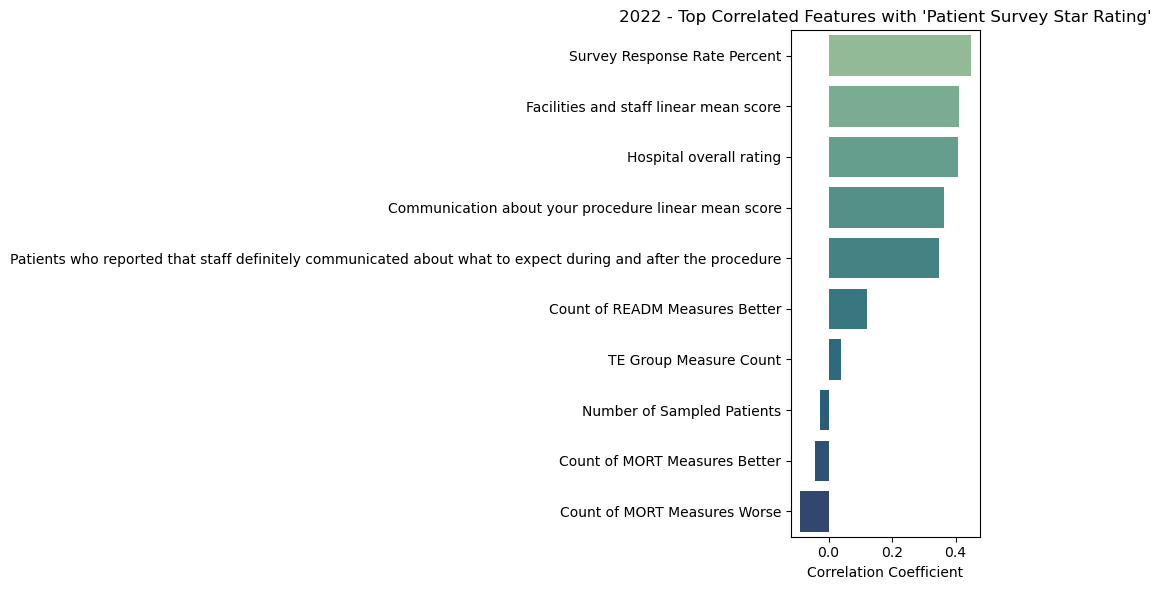


Top correlations with 'Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)' for 2022:
 Facilities and staff linear mean score                                                                          0.602389
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0.518496
Communication about your procedure linear mean score                                                            0.514311
Patient Survey Star Rating                                                                                      0.456871
Hospital overall rating                                                                                         0.365659
HCAHPS Linear Mean Value                                                                                        0.324651
Survey Response Rate Percent                                                                                    0.280812
Number of Sampled Patie

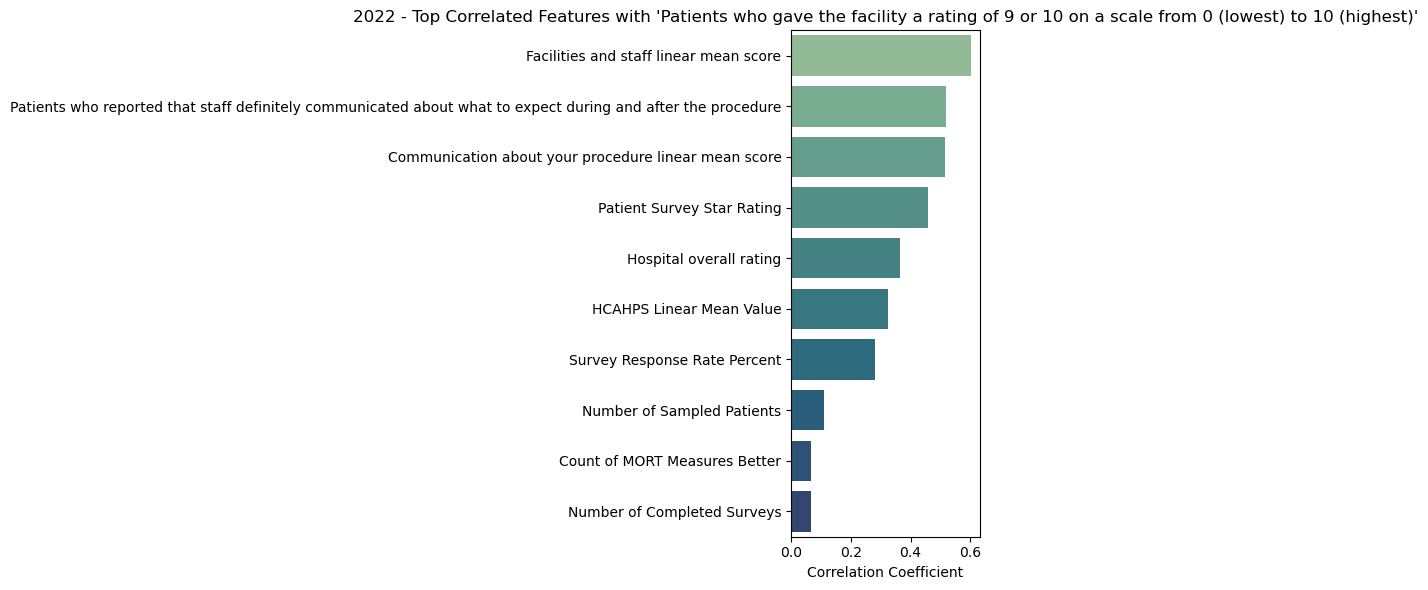


Top correlations with 'Patients who reported YES they would DEFINITELY recommend the facility to family or friends' for 2022:
 Facilities and staff linear mean score                                                                          0.429990
Patient Survey Star Rating                                                                                      0.425153
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0.363598
Communication about your procedure linear mean score                                                            0.359086
Hospital overall rating                                                                                         0.340763
HCAHPS Linear Mean Value                                                                                        0.307902
Survey Response Rate Percent                                                                                    0.287221
Number of Sampled Patient

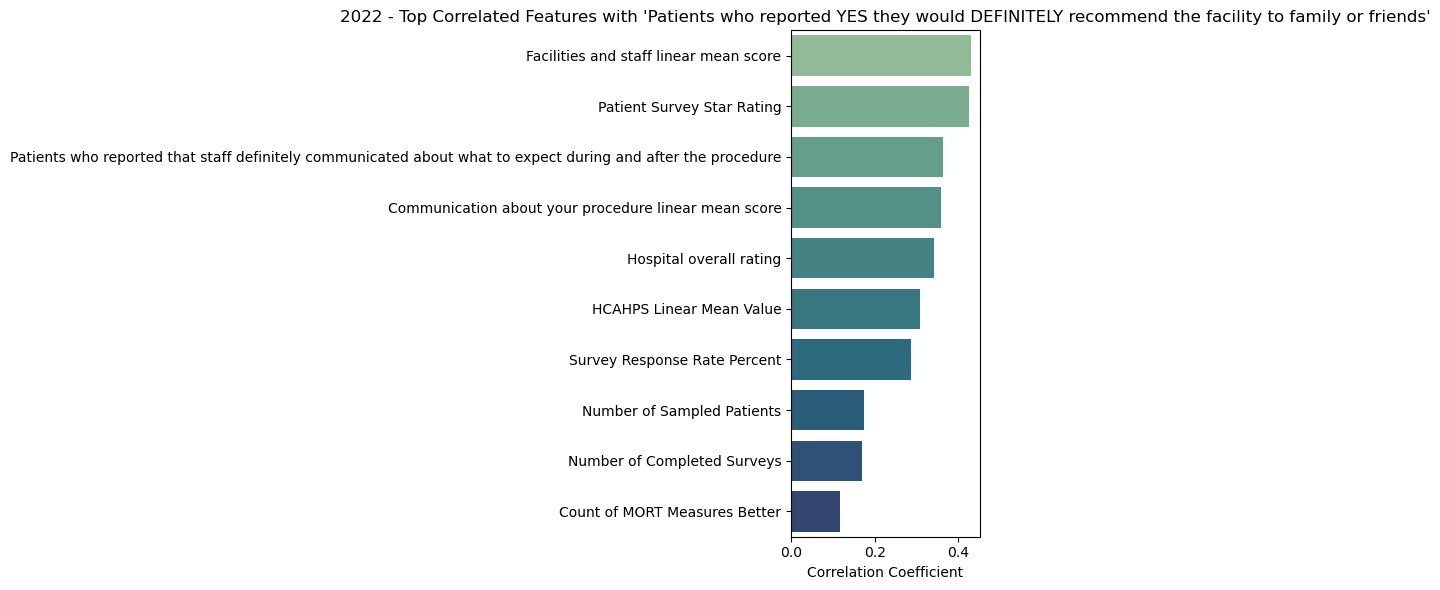


Top correlations with 'Patients recommending the facility linear mean score' for 2022:
 Facilities and staff linear mean score                                                                          0.452693
Patient Survey Star Rating                                                                                      0.437306
Communication about your procedure linear mean score                                                            0.356838
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0.352592
Hospital overall rating                                                                                         0.327461
HCAHPS Linear Mean Value                                                                                        0.318058
Survey Response Rate Percent                                                                                    0.276142
Number of Sampled Patients                                      

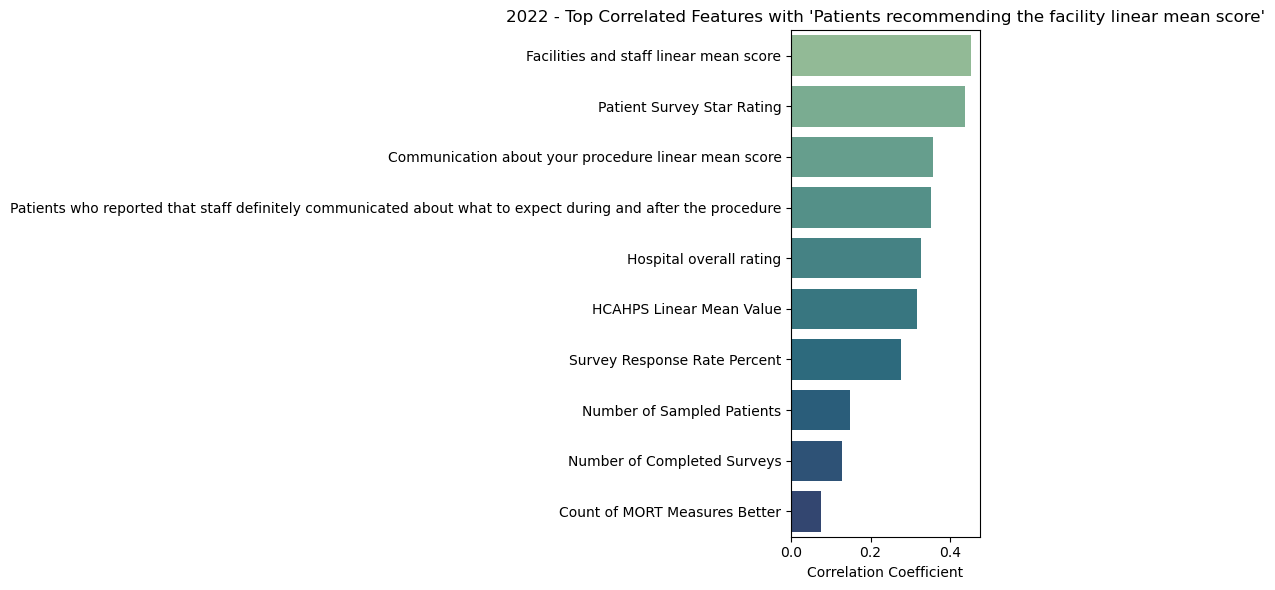


Top correlations with 'Patient Survey Star Rating' for 2023:
 Facilities and staff linear mean score                                                                          0.476323
Survey Response Rate Percent                                                                                    0.450971
Hospital overall rating                                                                                         0.443552
Communication about your procedure linear mean score                                                            0.425325
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0.422398
Count of READM Measures Better                                                                                  0.095327
Number of Sampled Patients                                                                                     -0.015588
Count of MORT Measures Better                                                             

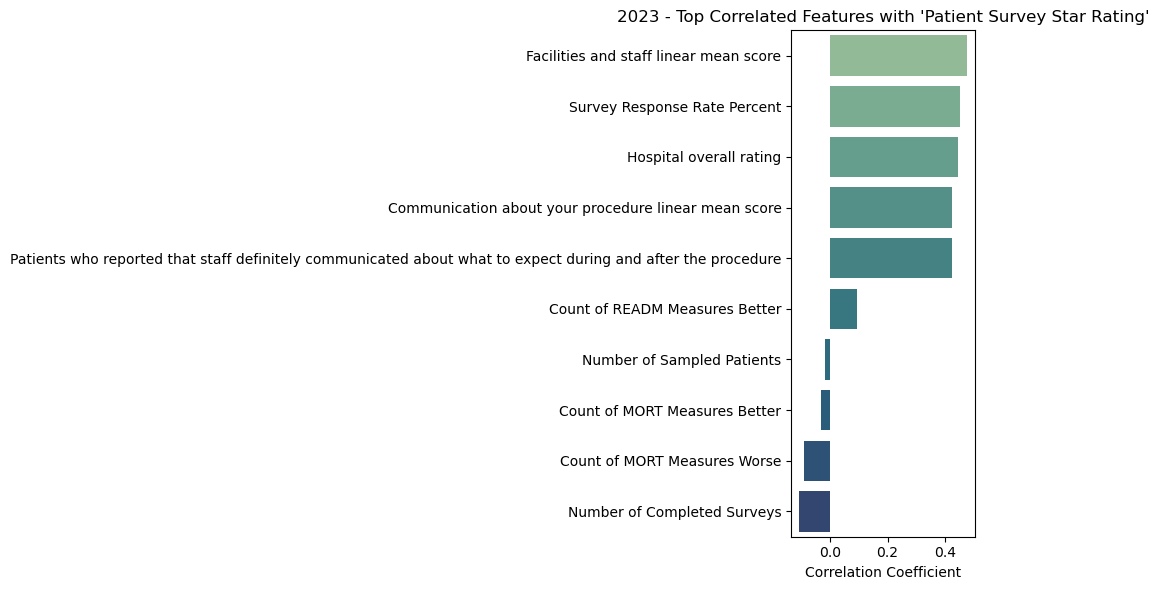


Top correlations with 'Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)' for 2023:
 Facilities and staff linear mean score                                                                          0.649690
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0.615028
Communication about your procedure linear mean score                                                            0.598010
Patient Survey Star Rating                                                                                      0.526171
Hospital overall rating                                                                                         0.443594
HCAHPS Linear Mean Value                                                                                        0.382147
Survey Response Rate Percent                                                                                    0.375081
Number of Sampled Patie

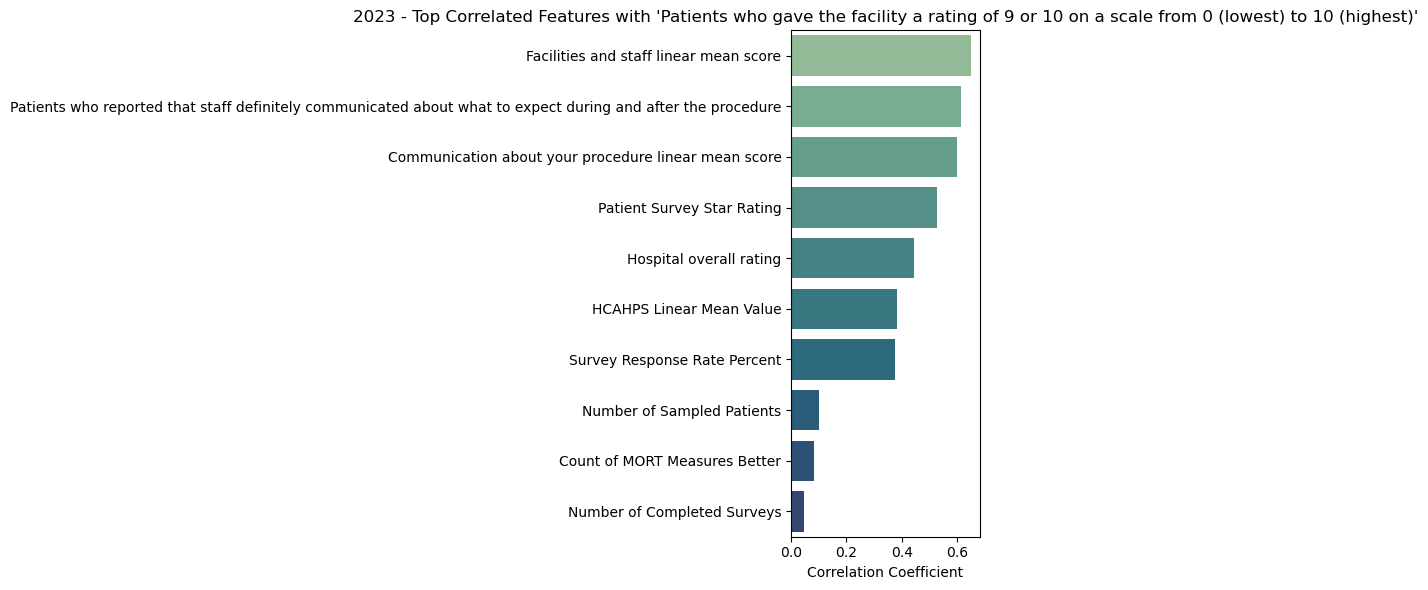


Top correlations with 'Patients who reported YES they would DEFINITELY recommend the facility to family or friends' for 2023:
 Facilities and staff linear mean score                                                                          0.506794
Hospital overall rating                                                                                         0.498782
Patient Survey Star Rating                                                                                      0.491259
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0.473343
Communication about your procedure linear mean score                                                            0.462004
HCAHPS Linear Mean Value                                                                                        0.357294
Survey Response Rate Percent                                                                                    0.347467
Number of Sampled Patient

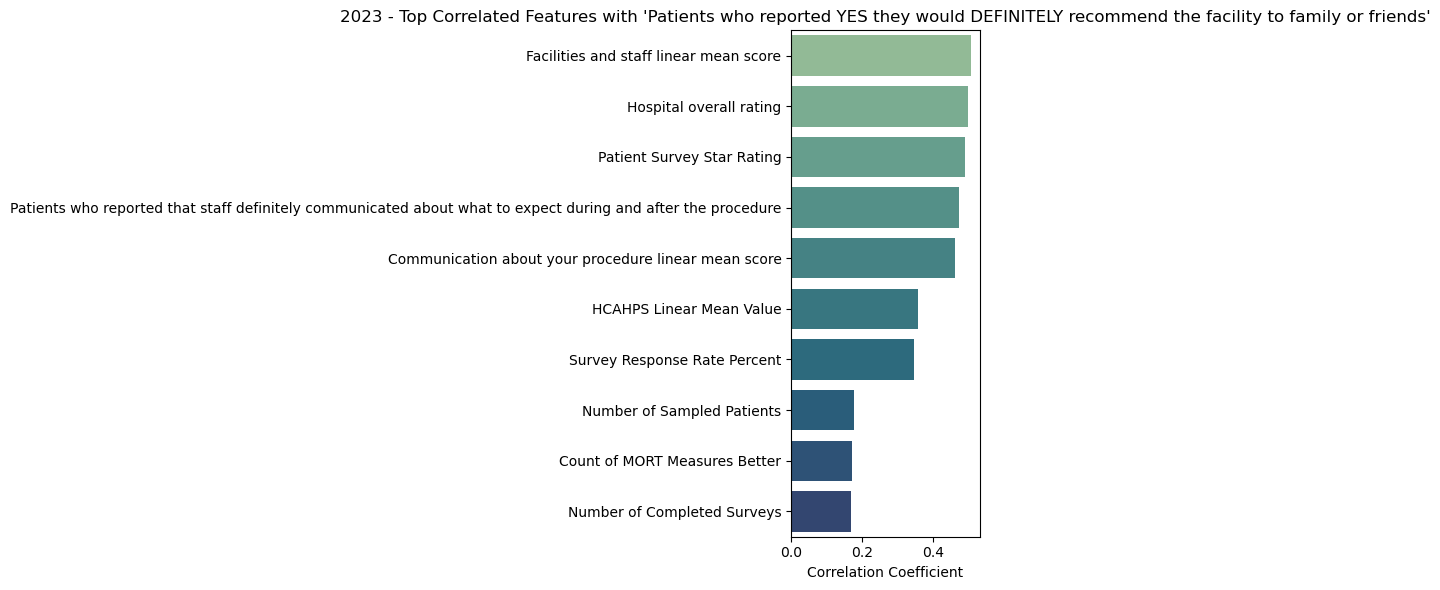


Top correlations with 'Patients recommending the facility linear mean score' for 2023:
 Facilities and staff linear mean score                                                                          0.588038
Patient Survey Star Rating                                                                                      0.537737
Communication about your procedure linear mean score                                                            0.526075
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0.525389
Hospital overall rating                                                                                         0.513285
HCAHPS Linear Mean Value                                                                                        0.392836
Survey Response Rate Percent                                                                                    0.392325
Number of Sampled Patients                                      

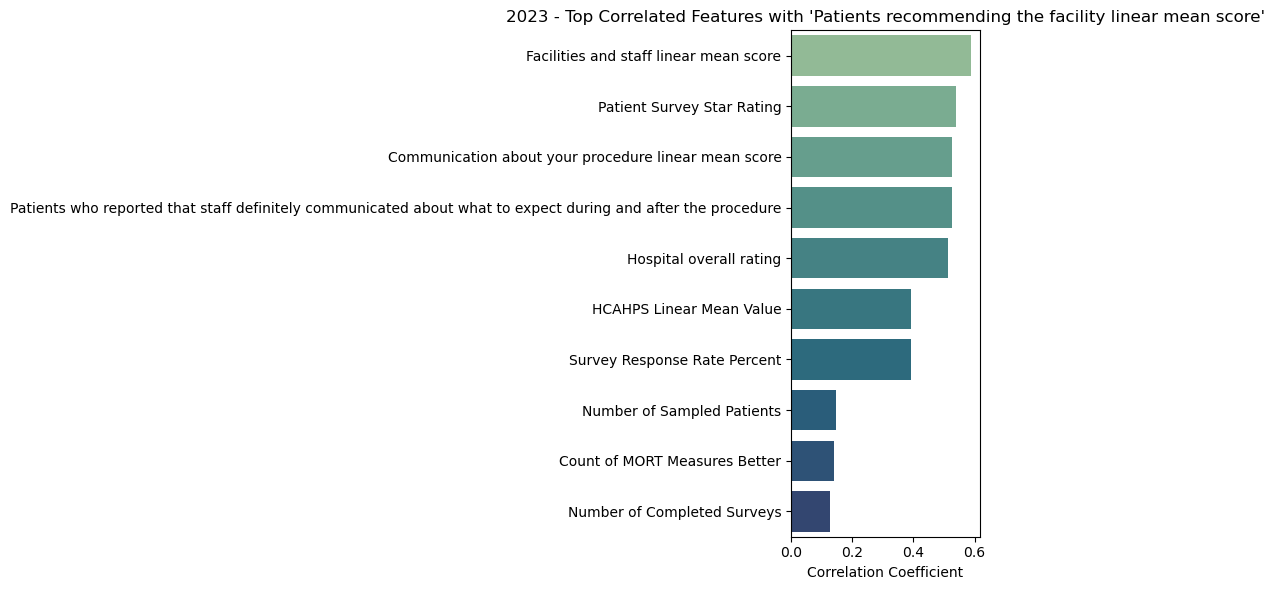


Top correlations with 'Patient Survey Star Rating' for 2024:
 Hospital overall rating                                                                                         0.454866
Survey Response Rate Percent                                                                                    0.454141
Facilities and staff linear mean score                                                                          0.421504
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0.385246
Communication about your procedure linear mean score                                                            0.379032
Count of READM Measures Better                                                                                  0.094064
Count of MORT Measures Better                                                                                  -0.013590
Number of Sampled Patients                                                                

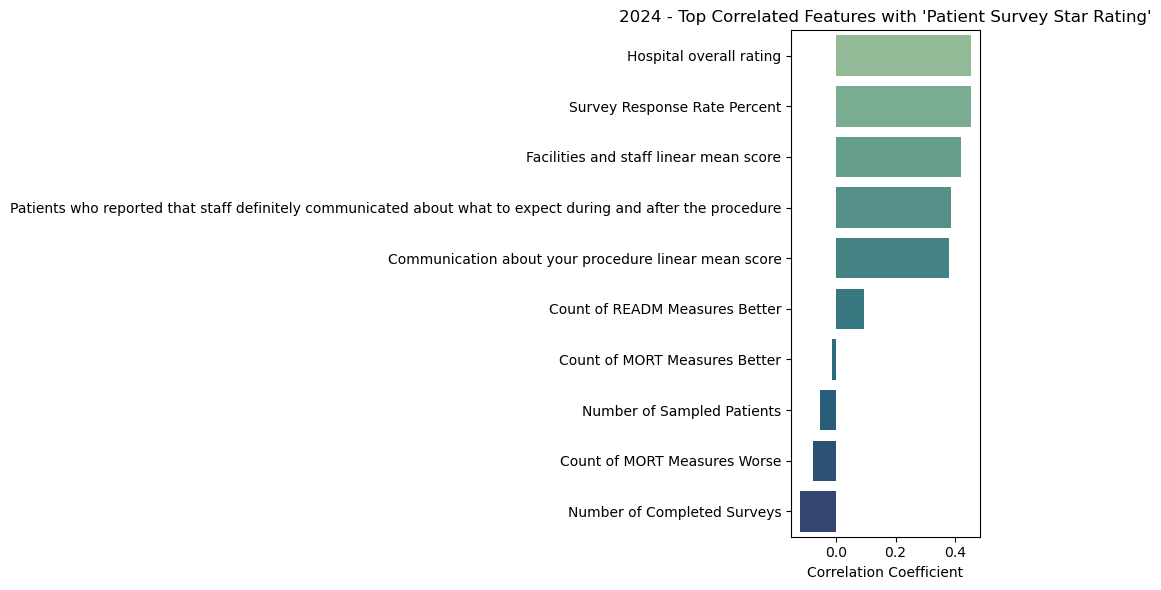


Top correlations with 'Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)' for 2024:
 Facilities and staff linear mean score                                                                          0.645753
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0.606368
Communication about your procedure linear mean score                                                            0.588615
Patient Survey Star Rating                                                                                      0.509116
Hospital overall rating                                                                                         0.459058
HCAHPS Linear Mean Value                                                                                        0.362287
Survey Response Rate Percent                                                                                    0.328834
Number of Sampled Patie

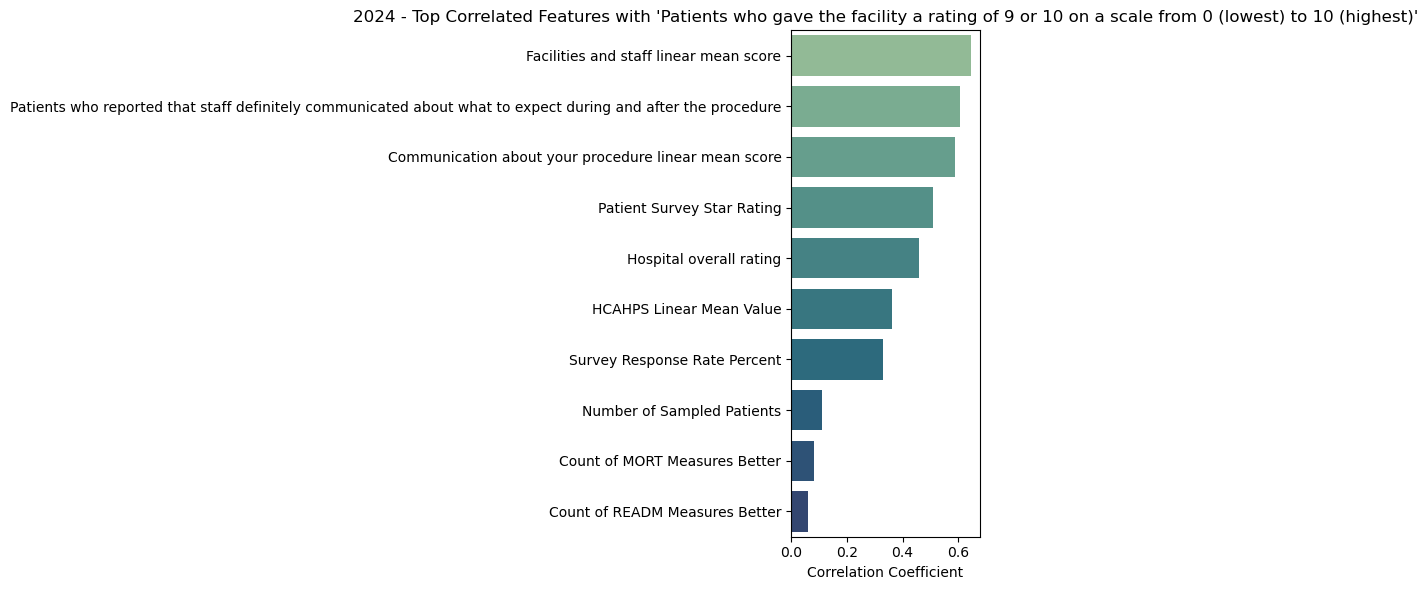


Top correlations with 'Patients who reported YES they would DEFINITELY recommend the facility to family or friends' for 2024:
 Facilities and staff linear mean score                                                                          0.504826
Hospital overall rating                                                                                         0.478262
Patient Survey Star Rating                                                                                      0.469719
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0.449015
Communication about your procedure linear mean score                                                            0.428534
HCAHPS Linear Mean Value                                                                                        0.334262
Survey Response Rate Percent                                                                                    0.312407
Number of Sampled Patient

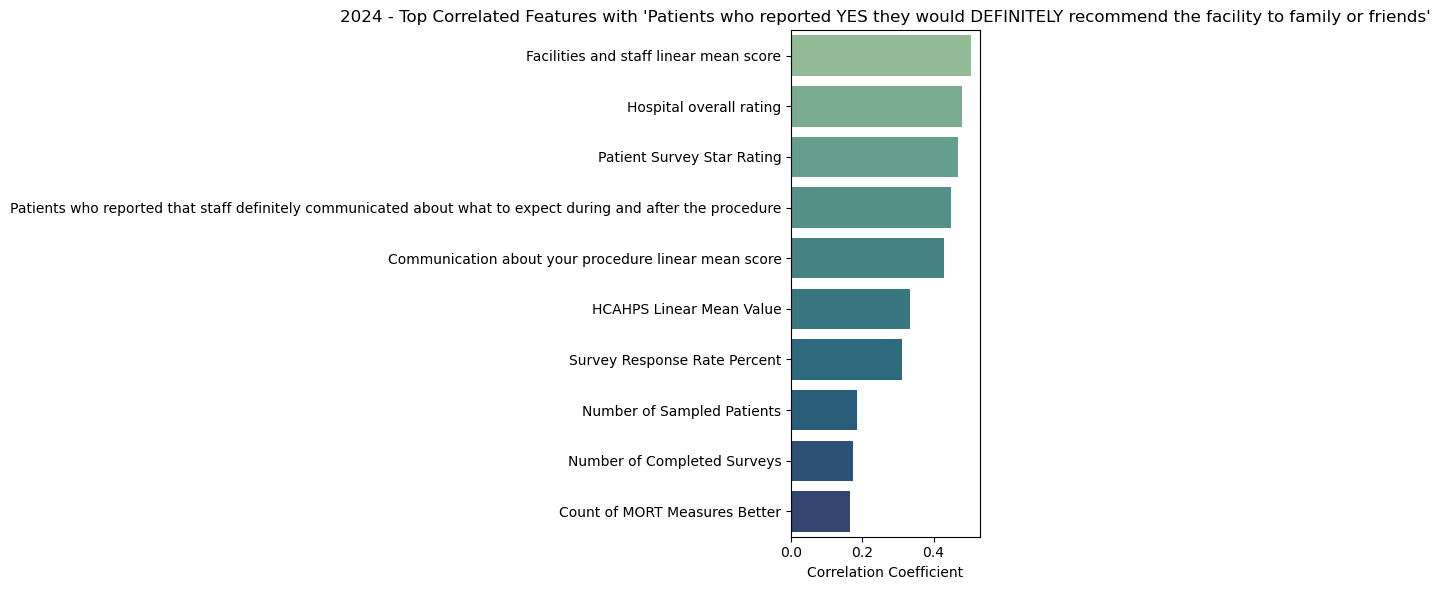


Top correlations with 'Patients recommending the facility linear mean score' for 2024:
 Facilities and staff linear mean score                                                                          0.624204
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0.535537
Communication about your procedure linear mean score                                                            0.528571
Hospital overall rating                                                                                         0.495582
Patient Survey Star Rating                                                                                      0.489326
HCAHPS Linear Mean Value                                                                                        0.352438
Survey Response Rate Percent                                                                                    0.330423
Number of Sampled Patients                                      

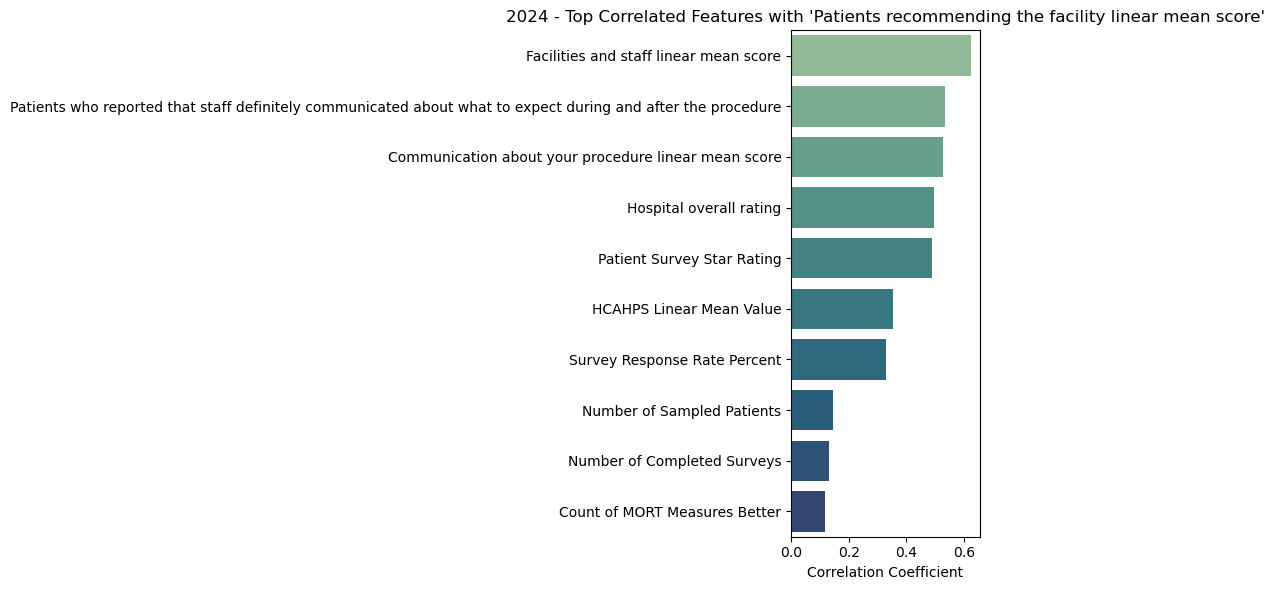


Top correlations with 'Patient Survey Star Rating' for 2025:
 Hospital overall rating                                                                                         0.454866
Survey Response Rate Percent                                                                                    0.454141
Facilities and staff linear mean score                                                                          0.421504
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0.385246
Communication about your procedure linear mean score                                                            0.379032
Count of READM Measures Better                                                                                  0.094064
Count of MORT Measures Better                                                                                  -0.013590
Number of Sampled Patients                                                                

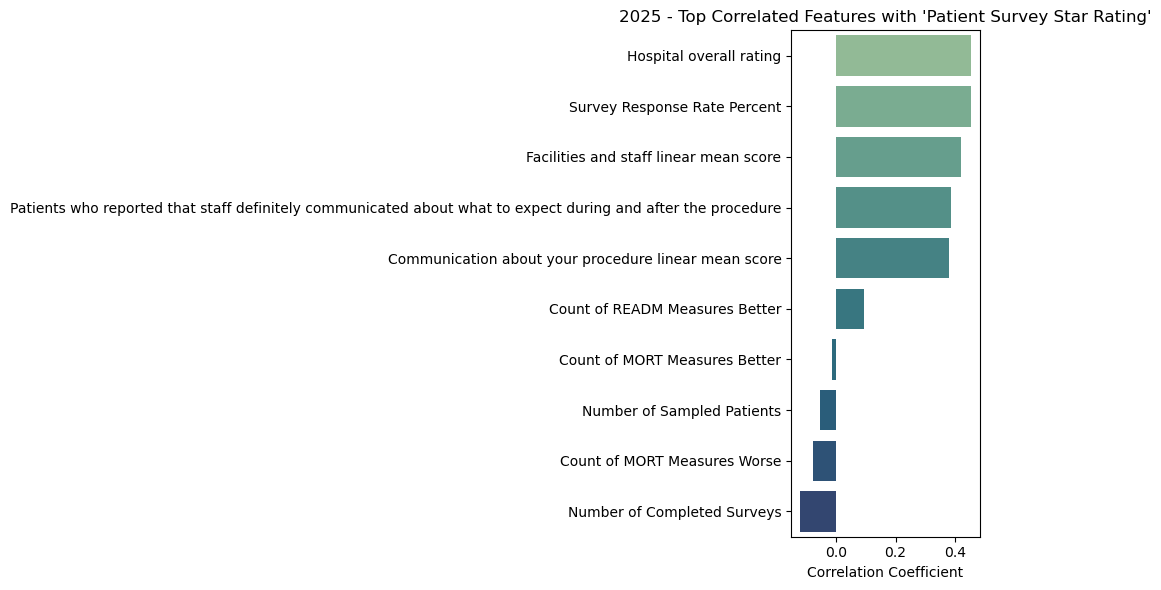


Top correlations with 'Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)' for 2025:
 Facilities and staff linear mean score                                                                          0.645753
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0.606368
Communication about your procedure linear mean score                                                            0.588615
Patient Survey Star Rating                                                                                      0.509116
Hospital overall rating                                                                                         0.459058
HCAHPS Linear Mean Value                                                                                        0.362287
Survey Response Rate Percent                                                                                    0.328834
Number of Sampled Patie

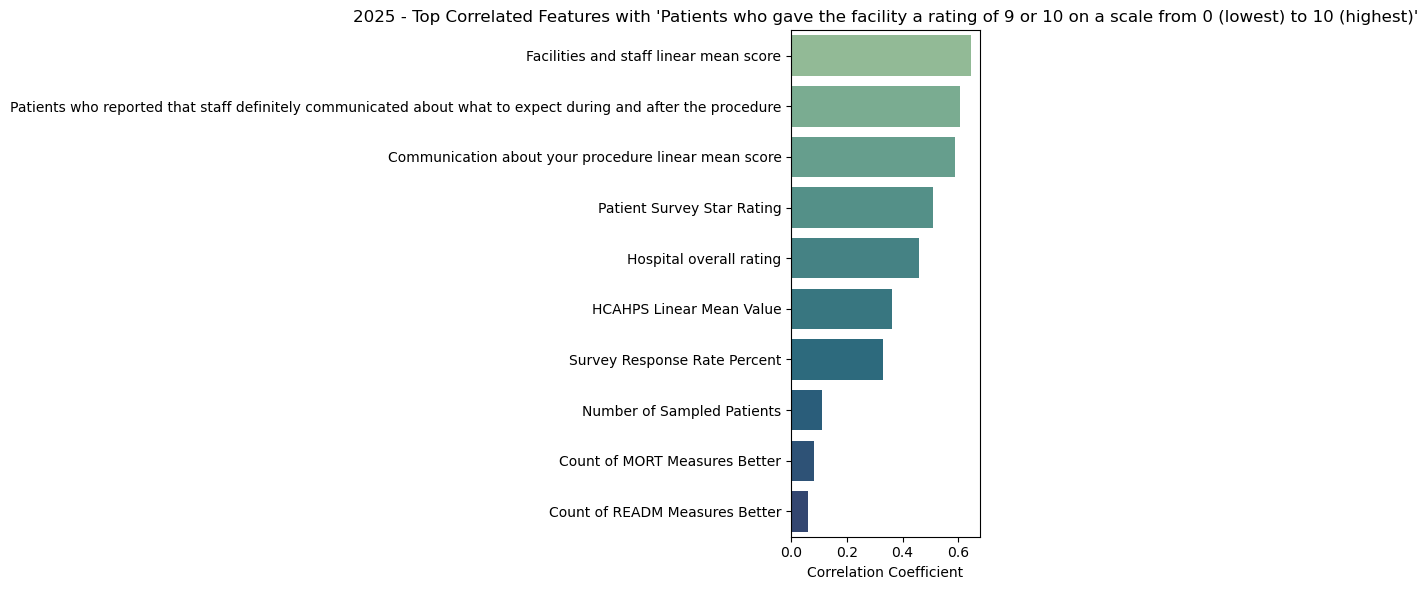


Top correlations with 'Patients who reported YES they would DEFINITELY recommend the facility to family or friends' for 2025:
 Facilities and staff linear mean score                                                                          0.504826
Hospital overall rating                                                                                         0.478262
Patient Survey Star Rating                                                                                      0.469719
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0.449015
Communication about your procedure linear mean score                                                            0.428534
HCAHPS Linear Mean Value                                                                                        0.334262
Survey Response Rate Percent                                                                                    0.312407
Number of Sampled Patient

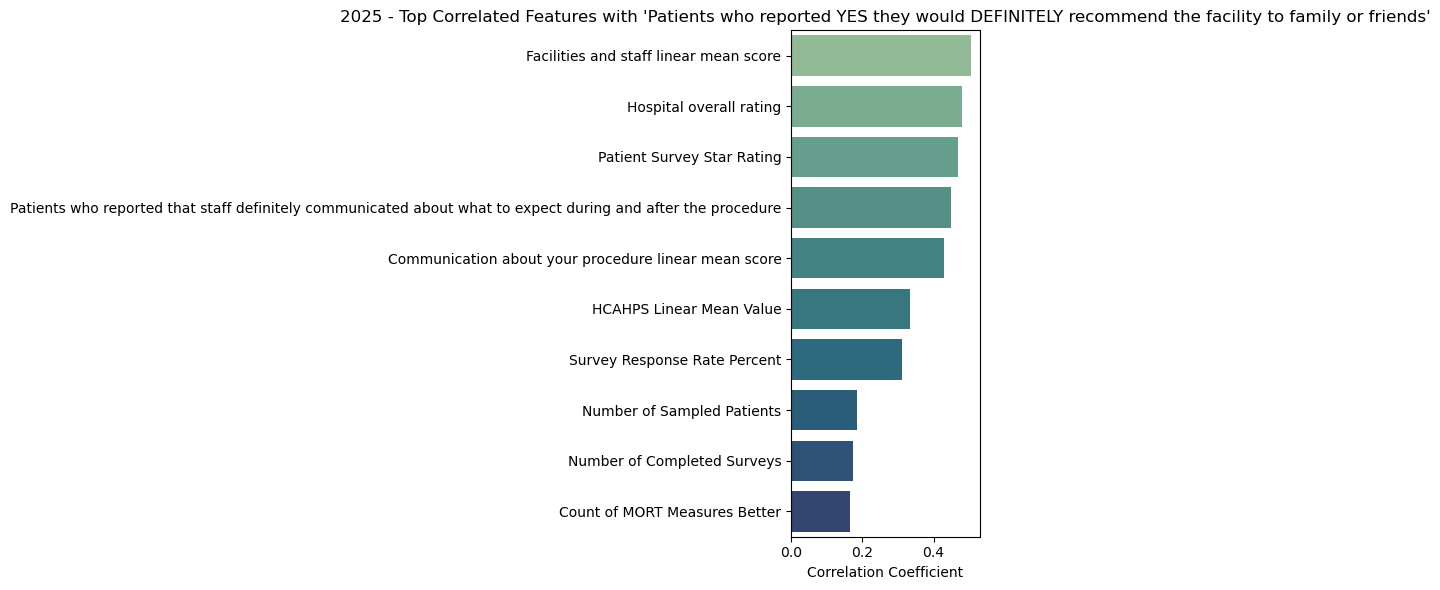


Top correlations with 'Patients recommending the facility linear mean score' for 2025:
 Facilities and staff linear mean score                                                                          0.624204
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0.535537
Communication about your procedure linear mean score                                                            0.528571
Hospital overall rating                                                                                         0.495582
Patient Survey Star Rating                                                                                      0.489326
HCAHPS Linear Mean Value                                                                                        0.352438
Survey Response Rate Percent                                                                                    0.330423
Number of Sampled Patients                                      

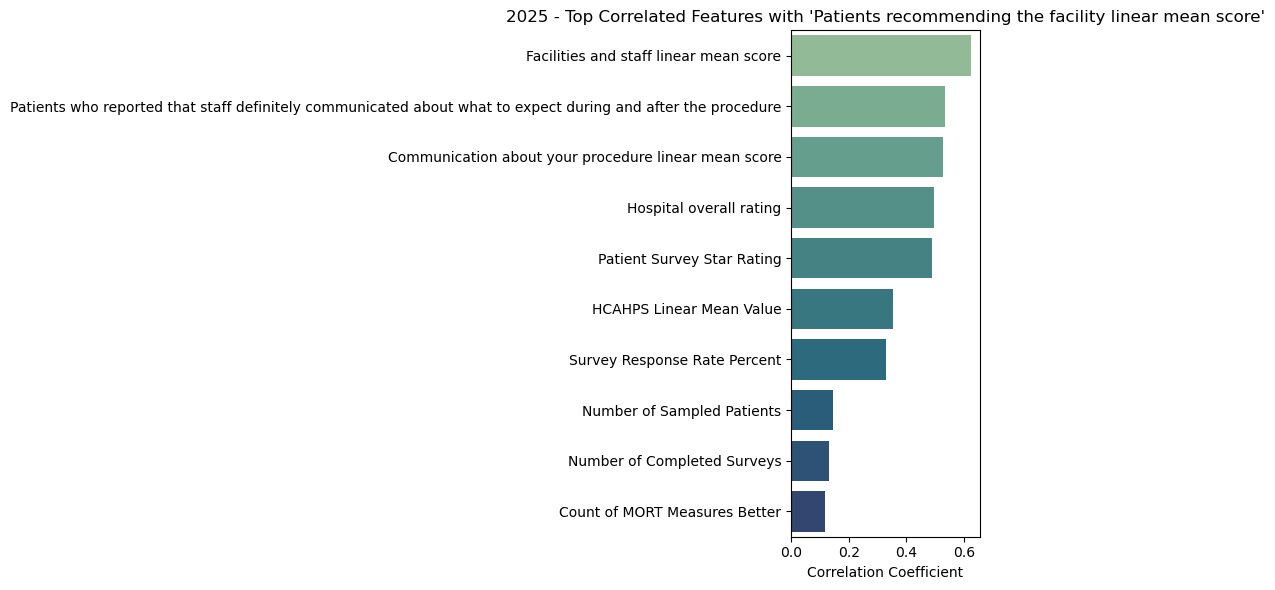

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Target satisfaction columns (dependent variables)
target_columns = [
    'Patient Survey Star Rating',
    'Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)',
    'Patients who reported YES they would DEFINITELY recommend the facility to family or friends',
    'Patients recommending the facility linear mean score',
    'Patients’ rating of the facility linear mean score'
]

# Columns to exclude from feature correlation (non-numeric or metadata)
exclude_keywords = [
    'ID', 'Name', 'Address', 'City', 'State', 'ZIP', 'County', 'Phone', 'Footnote',
    'Start Date', 'End Date', 'Telephone', 'Facility', 'Question', 'Description'
]

# Helper to filter only usable numeric features
def get_valid_features(df, target):
    df_numeric = df.apply(pd.to_numeric, errors='coerce')
    usable_columns = [col for col in df_numeric.columns 
                      if all(kw.lower() not in col.lower() for kw in exclude_keywords)
                      and col != target
                      and df_numeric[col].notna().sum() > 100]  # ignore columns with very little data
    return df_numeric[usable_columns + [target]]

# Function to compute and plot correlation for each target
def analyze_target_correlations(df, year):
    for target in target_columns:
        if target in df.columns:
            df_filtered = get_valid_features(df, target)
            df_filtered = df_filtered.dropna(subset=[target])
            if df_filtered.shape[0] == 0:
                print(f"No data for target: {target} in {year}")
                continue
            
            # Correlation with target
            corr = df_filtered.corr()[target].drop(labels=[target]).sort_values(ascending=False)
            top_corr = corr.head(10)

            print(f"\nTop correlations with '{target}' for {year}:\n", top_corr)

            # Plot
            plt.figure(figsize=(10, 6))
            sns.barplot(x=top_corr.values, y=top_corr.index, palette="crest")
            plt.title(f"{year} - Top Correlated Features with '{target}'")
            plt.xlabel("Correlation Coefficient")
            plt.tight_layout()
            plt.show()

# Loop through all yearly DataFrames
yearly_dfs = {
    2022: yr2022_df,
    2023: yr2023_df,
    2024: yr2024_df,
    2025: yr2025_df
}

# Run correlation analysis
for year, df in yearly_dfs.items():
    analyze_target_correlations(df, year)


In [16]:
obvious_features = [
    'Survey Response Rate Percent',
    'Facilities and staff linear mean score',
    'Hospital overall rating',
    'Communication about your procedure linear mean score',
    'Patients who reported that staff definitely communicated about what to expect during and after the procedure',
    "Patients' rating of the facility linear mean score",
    'Patients recommending the facility linear mean score'
]



non_obvious_features = [
    'Count of MORT Measures Better',
    'Count of MORT Measures Worse',
    'Count of READM Measures Better',
    'Number of Sampled Patients',
    'Number of Completed Surveys',
    'TE Group Measure Count',
    'Pt Exp Group Measure Count',
    'Hospital Type',
    'Hospital Ownership',
    'Emergency Services',
    'ZIP Code',  # Could help indirectly via regional trends
    'State',
    'County Name'
]


the first baseline model code I gave you used only the obvious features, selected based on:

High correlation with patient satisfaction,

Logical/intuitive links to patient experience.

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# STEP 1: Concatenate all years
all_years_df = pd.concat([yr2022_df, yr2023_df, yr2024_df, yr2025_df], ignore_index=True)

# STEP 2: Define OBVIOUS features based on correlation and intuition
obvious_features = [
    'Facilities and staff linear mean score',
    'Survey Response Rate Percent',
    'Hospital overall rating',
    'Communication about your procedure linear mean score',
    'Patients who reported that staff definitely communicated about what to expect during and after the procedure'
]

# STEP 3: Target variable
target_variable = 'Patient Survey Star Rating'

# STEP 4: Prepare feature set and target
X = all_years_df[obvious_features].copy()
y = all_years_df[target_variable].copy()

# STEP 5: Clean feature columns
X = X.replace(['Not Available', 'Not applicable', 'Not Applicable'], np.nan)
X = X.apply(pd.to_numeric, errors='coerce')  # Convert to numeric and coerce errors to NaN

# STEP 6: Drop rows with any NaNs in X or y
mask = X.notna().all(axis=1) & y.notna()

X = X[mask]
y = y[mask]

# STEP 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 8: Train Random Forest baseline model
rf_baseline = RandomForestRegressor(random_state=42)
rf_baseline.fit(X_train, y_train)

# STEP 9: Predict and evaluate
y_pred = rf_baseline.predict(X_test)
print("✅ Baseline Model Evaluation")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

print("R² Score:", r2_score(y_test, y_pred))


✅ Baseline Model Evaluation
Mean Squared Error: 0.4616639185092054
R² Score: 0.5191587604733366


Here's the complete model pipeline using both obvious + non-obvious features to improve your patient satisfaction prediction. This version includes:

Clean-up of "Not Available" strings

One-hot encoding for categorical variables

Feature selection using combined features

Random Forest model training

Evaluation with MSE and R²

In [18]:
# 📌 Import Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ✅ Combine All Yearly DataFrames
all_years_df = pd.concat([yr2022_df, yr2023_df, yr2024_df, yr2025_df], ignore_index=True)

# ✅ Define Obvious + Non-Obvious Features
obvious_features = [
    'Facilities and staff linear mean score',
    'Survey Response Rate Percent',
    'Hospital overall rating',
    'Communication about your procedure linear mean score',
    'Patients who reported that staff definitely communicated about what to expect during and after the procedure'
]

non_obvious_features = [
    'Count of MORT Measures Better',
    'Count of MORT Measures Worse',
    'Count of READM Measures Better',
    'Count of READM Measures Worse',
    'Number of Sampled Patients',
    'Number of Completed Surveys',
    'TE Group Measure Count',
    'Pt Exp Group Measure Count',
    'Hospital Type',
    'Hospital Ownership',
    'Emergency Services'
]

all_features = obvious_features + non_obvious_features
target_variable = 'Patient Survey Star Rating'

# ✅ Extract X and y
X = all_years_df[all_features].copy()
y = all_years_df[target_variable].copy()

# ✅ Clean up 'Not Available' values and convert numerics
X = X.replace(['Not Available', 'Not applicable', 'Not Applicable'], np.nan)
X = X.apply(pd.to_numeric, errors='ignore')  # allow categoricals to remain for encoding

# ✅ One-hot encode categorical features
categoricals = ['Hospital Type', 'Hospital Ownership', 'Emergency Services']
X = pd.get_dummies(X, columns=categoricals)

# ✅ Convert all columns to numeric now
X = X.apply(pd.to_numeric, errors='coerce')

# ✅ Filter complete cases (no NaN in features or target)
mask = X.notna().all(axis=1) & y.notna()
X = X[mask]
y = y[mask]

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# ✅ Evaluate
y_pred = rf_model.predict(X_test)
print("📊 Extended Model Evaluation")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


📊 Extended Model Evaluation
Mean Squared Error: 0.3811568584455982
R² Score: 0.5985645160173587


✅ What This Means:
Your model is now explaining ~60% of the variation in patient satisfaction.

You’ve significantly reduced error by ~17%.

Non-obvious features like mortality/readmission/survey volume really do add predictive power.

![alt text](image-1.png)

🔧 Step 3: Hyperparameter Tuning (Random Forest Grid Search)
🧠 Why?
Default parameters are rarely optimal. Tuning lets you find better combinations for accuracy and generalization.

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best model from grid
best_rf = grid_search.best_estimator_

# Evaluate best model
y_pred_best = best_rf.predict(X_test)
print("📊 Tuned Model Evaluation")
print("Best R² Score on test set:", r2_score(y_test, y_pred_best))
print("Best MSE on test set:", mean_squared_error(y_test, y_pred_best))
print("Best Params:", grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
📊 Tuned Model Evaluation
Best R² Score on test set: 0.5992802161204134
Best MSE on test set: 0.3804773121330423
Best Params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


📈 Step 4: Cross-Validation for Robustness
🧠 Why?
Evaluating your model on just one test split can be misleading. Cross-validation gives a better picture of overall performance.

In [20]:
from sklearn.model_selection import cross_val_score

# Use best model from Grid Search (or rf_model if skipping tuning)
model_for_cv = best_rf  # or use `rf_model` if skipping Step 3

# Run 5-fold cross-validation
cv_scores = cross_val_score(model_for_cv, X, y, cv=5, scoring='r2')

# Report
print("📊 Cross-Validation Results (R²):")
print("Scores:", cv_scores)
print("Mean R²:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


📊 Cross-Validation Results (R²):
Scores: [0.26562109 0.43708962 0.55586952 0.6696079  0.67129693]
Mean R²: 0.519897010484406
Standard Deviation: 0.1537157218469551


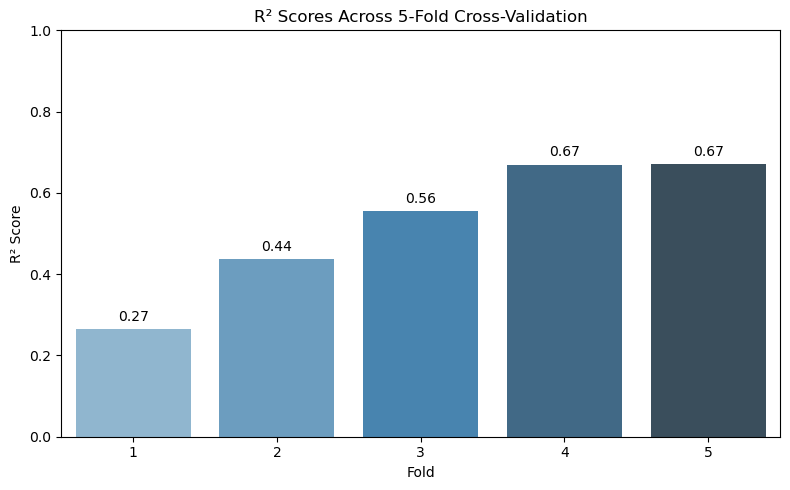

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample cross-validation scores (replace with your actual `cv_scores`)
cv_scores = [0.2656, 0.4371, 0.5559, 0.6696, 0.6713]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=np.arange(1, 6), y=cv_scores, palette='Blues_d')
plt.title('R² Scores Across 5-Fold Cross-Validation')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.ylim(0, 1)  # Set consistent scale for interpretability
for i, score in enumerate(cv_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


🔍 Step 5: Error Analysis
🧠 Why?
By examining where your model is wrong, you can:

Discover patterns in poor predictions,

Decide which features might help,

Flag outliers or quality issues in data.

🔍 Top 10 Worst Predictions by Absolute Error
      Actual  Predicted     Error  Absolute Error
3008     1.0   3.821703 -2.821703        2.821703
3209     1.0   3.753044 -2.753044        2.753044
5902     1.0   3.732141 -2.732141        2.732141
1460     1.0   3.669461 -2.669461        2.669461
2510     1.0   3.498750 -2.498750        2.498750
1165     2.0   4.436176 -2.436176        2.436176
1714     2.0   4.422974 -2.422974        2.422974
4868     1.0   3.419846 -2.419846        2.419846
809      1.0   3.292363 -2.292363        2.292363
485      1.0   3.285061 -2.285061        2.285061


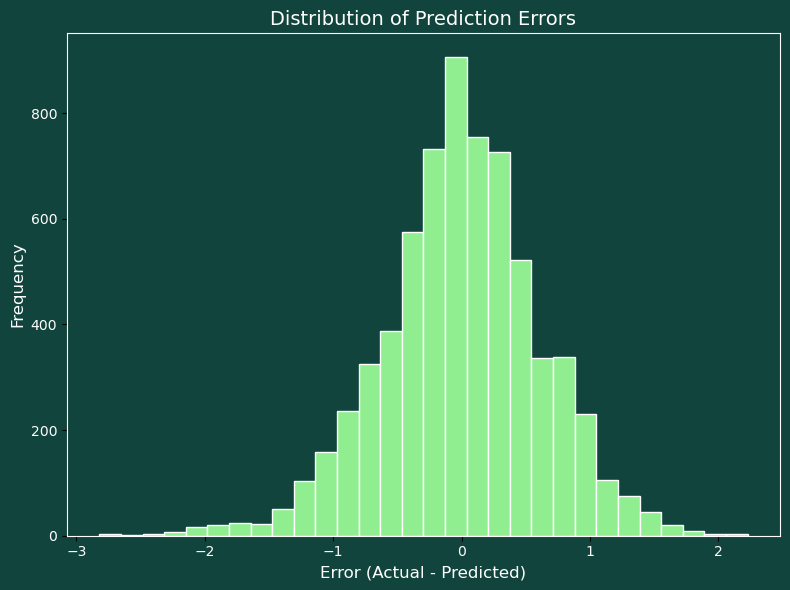

In [22]:
# Predict on test set using best model
y_pred_errors = best_rf.predict(X_test)

# Create a DataFrame to compare actual vs. predicted
error_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_errors,
    'Error': y_test.values - y_pred_errors
})

# Show worst predictions (by absolute error)
error_df['Absolute Error'] = error_df['Error'].abs()
error_df_sorted = error_df.sort_values(by='Absolute Error', ascending=False)

# Display top 10 largest errors
print("🔍 Top 10 Worst Predictions by Absolute Error")
print(error_df_sorted.head(10))

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), facecolor='#11443C')  # dark green background
ax = plt.gca()
ax.set_facecolor('#11443C')  # match the background inside plot area

# Plot histogram with teal and white accents
plt.hist(error_df['Error'], bins=30, color='#90EE90', edgecolor='white')

# Title and axes with white font
plt.title("Distribution of Prediction Errors", fontsize=14, color='white')
plt.xlabel("Error (Actual - Predicted)", fontsize=12, color='white')
plt.ylabel("Frequency", fontsize=12, color='white')

# Change tick color to white
plt.xticks(color='white')
plt.yticks(color='white')

# Style the borders
for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.tight_layout()
plt.show()



✅ Tuned Model Performance Summary
Metric	Value
Best R² on Test Set	0.599
Best MSE on Test Set	0.380
Best Hyperparameters	{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

You're holding steady with the same R² (~0.60) as the extended feature model, but the tuning:

Confirmed stability with optimized parameters.

Slightly improved MSE, showing a more precise model.

In [23]:
pip install xgboost


In [24]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ✅ Split the data again (in case you want a fresh split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # for regression
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# ✅ Train the model
xgb_model.fit(X_train, y_train)

# ✅ Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)

print("📊 XGBoost Model Evaluation")
print("R² Score:", r2_score(y_test, y_pred_xgb))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_xgb))


📊 XGBoost Model Evaluation
R² Score: 0.5532627606749614
Mean Squared Error: 0.42417018297055714


# 🔍 Interpretation
✅ Better than the baseline model (which had R² ~0.52).

⚠️ Slightly worse than the Random Forest (tuned) model (R² ~0.60).

❌ Not the best MSE — higher than the tuned RF's 0.38.

# 🤔 What Might Be Happening?
XGBoost may be overfitting or underfitting depending on its hyperparameters.

Random Forest might be better suited here because:

Your dataset has categorical features that were one-hot encoded (RF handles these naturally).

The data may not be large or complex enough to benefit from boosting.

# tune your XGBoost model using GridSearchCV to optimize key hyperparameters like max_depth, learning_rate, and n_estimators.

🔧 Step-by-Step: XGBoost Hyperparameter Tuning
🧠 Why?
Grid search will test combinations of parameters to find the best model for your data, improving performance and reducing error.

⏱️ What It Does:
Tries 3 × 3 × 2 = 18 parameter combos with 3-fold CV = 54 total fits

Searches for the best n_estimators, max_depth, and learning_rate

Trains the best model and prints evaluation results

In [25]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

# Initialize model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

# Set up GridSearchCV
xgb_grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit the model
xgb_grid.fit(X_train, y_train)

# Retrieve best model
best_xgb = xgb_grid.best_estimator_

# Evaluate best model on test set
y_pred_best_xgb = best_xgb.predict(X_test)

print("📊 Tuned XGBoost Model Evaluation")
print("Best R² on test set:", r2_score(y_test, y_pred_best_xgb))
print("Best MSE on test set:", mean_squared_error(y_test, y_pred_best_xgb))
print("Best Params:", xgb_grid.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
📊 Tuned XGBoost Model Evaluation
Best R² on test set: 0.5950600289770491
Best MSE on test set: 0.3844843153447633
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


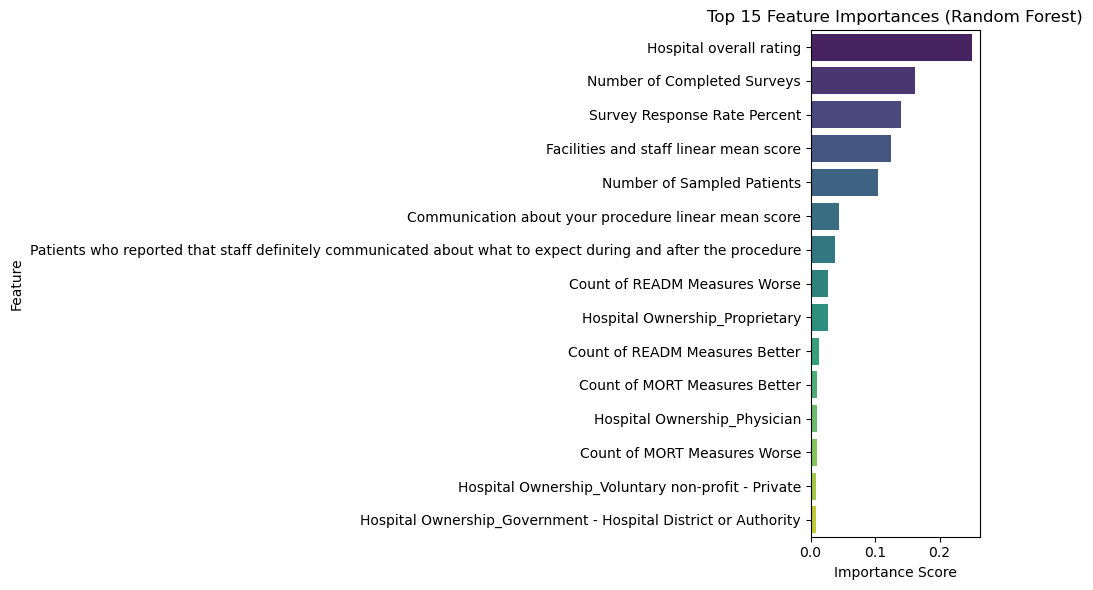

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the tuned Random Forest model
importances = best_rf.feature_importances_
feature_names = X.columns  # Replace with your actual feature list if needed

# Create a DataFrame for visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plot the top 15 most important features
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


![alt text](image-2.png)

## 🔍 Interpretation
Your tuned XGBoost model is nearly as strong as the best Random Forest model — just 0.004 lower in R² and 0.004 higher in MSE.

This suggests both models are performing similarly well and capturing important relationships in the data.

You can use SHAP on either model to investigate feature contributions (XGBoost integrates very easily with SHAP).

✅ Use feature importance methods: Random Forest, SHAP, and LIME.
# 🔍 Part 1: Feature Importance with Random Forest


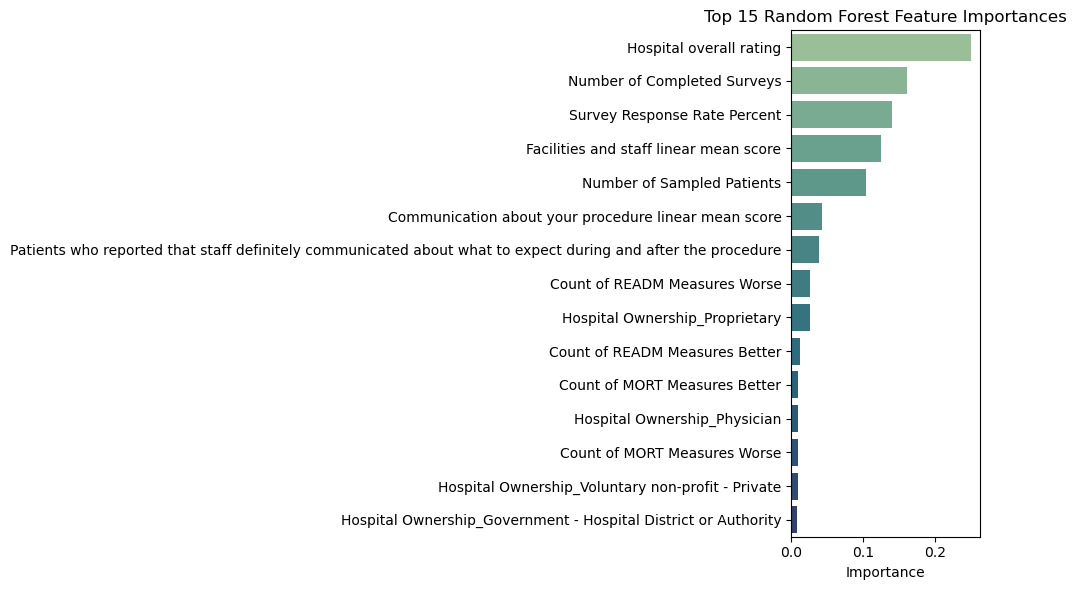

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from best RF model
rf_importances = best_rf.feature_importances_
rf_sorted_idx = np.argsort(rf_importances)[::-1][:15]  # top 15

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances[rf_sorted_idx], y=X.columns[rf_sorted_idx], palette="crest")
plt.title("Top 15 Random Forest Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


## 🔍 Part 2: Feature Importance with SHAP (for Tuned XGBoost)
🧠 Why SHAP?
SHAP gives global and local insights:

How much each feature pushes the prediction up/down.

Uncovers interactions and unexpected drivers.

c:\Users\mmadh\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


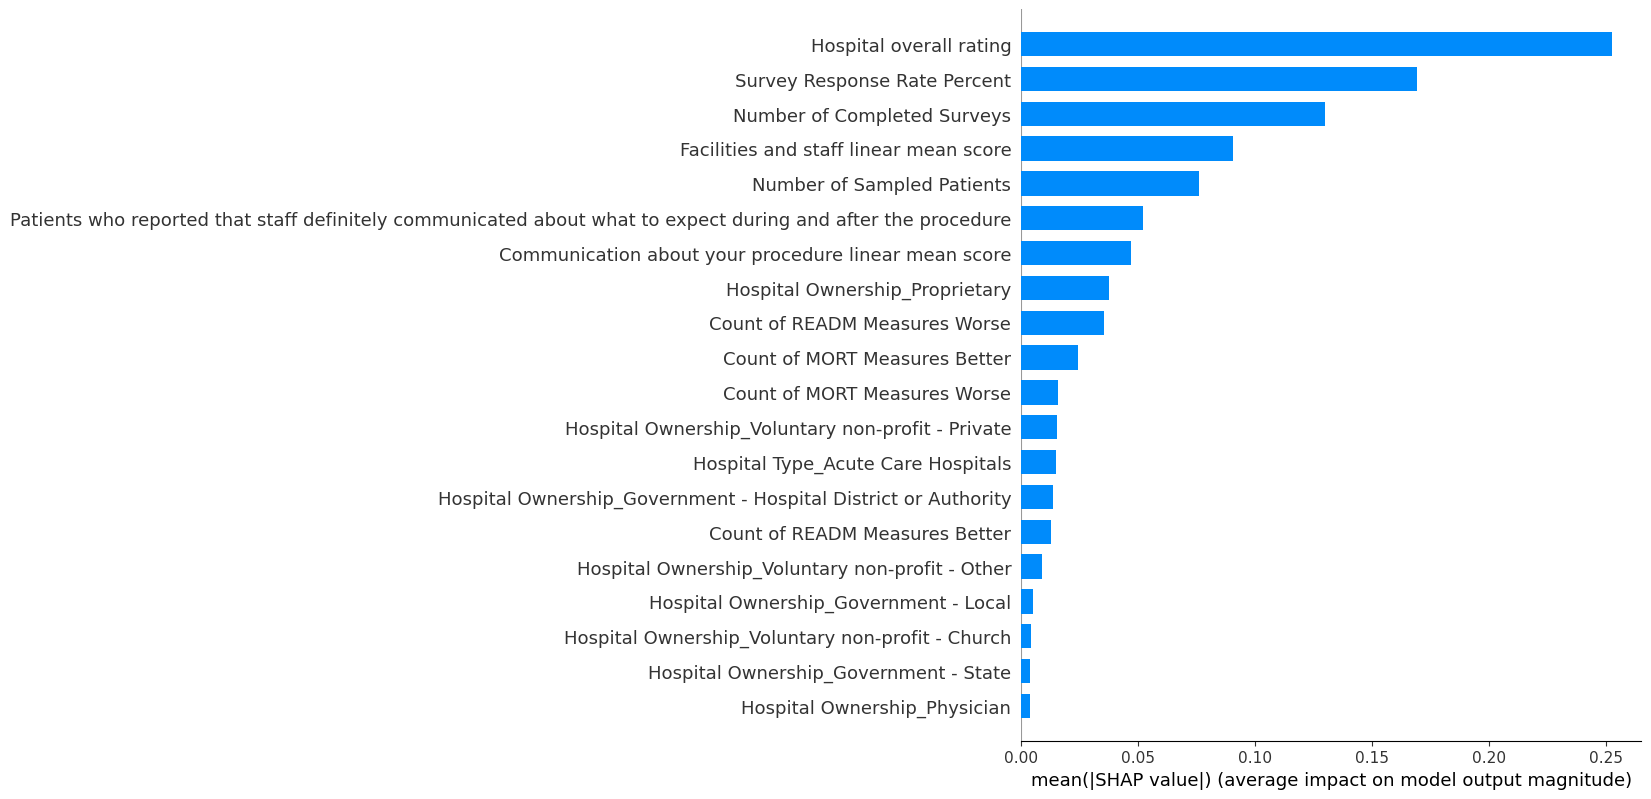

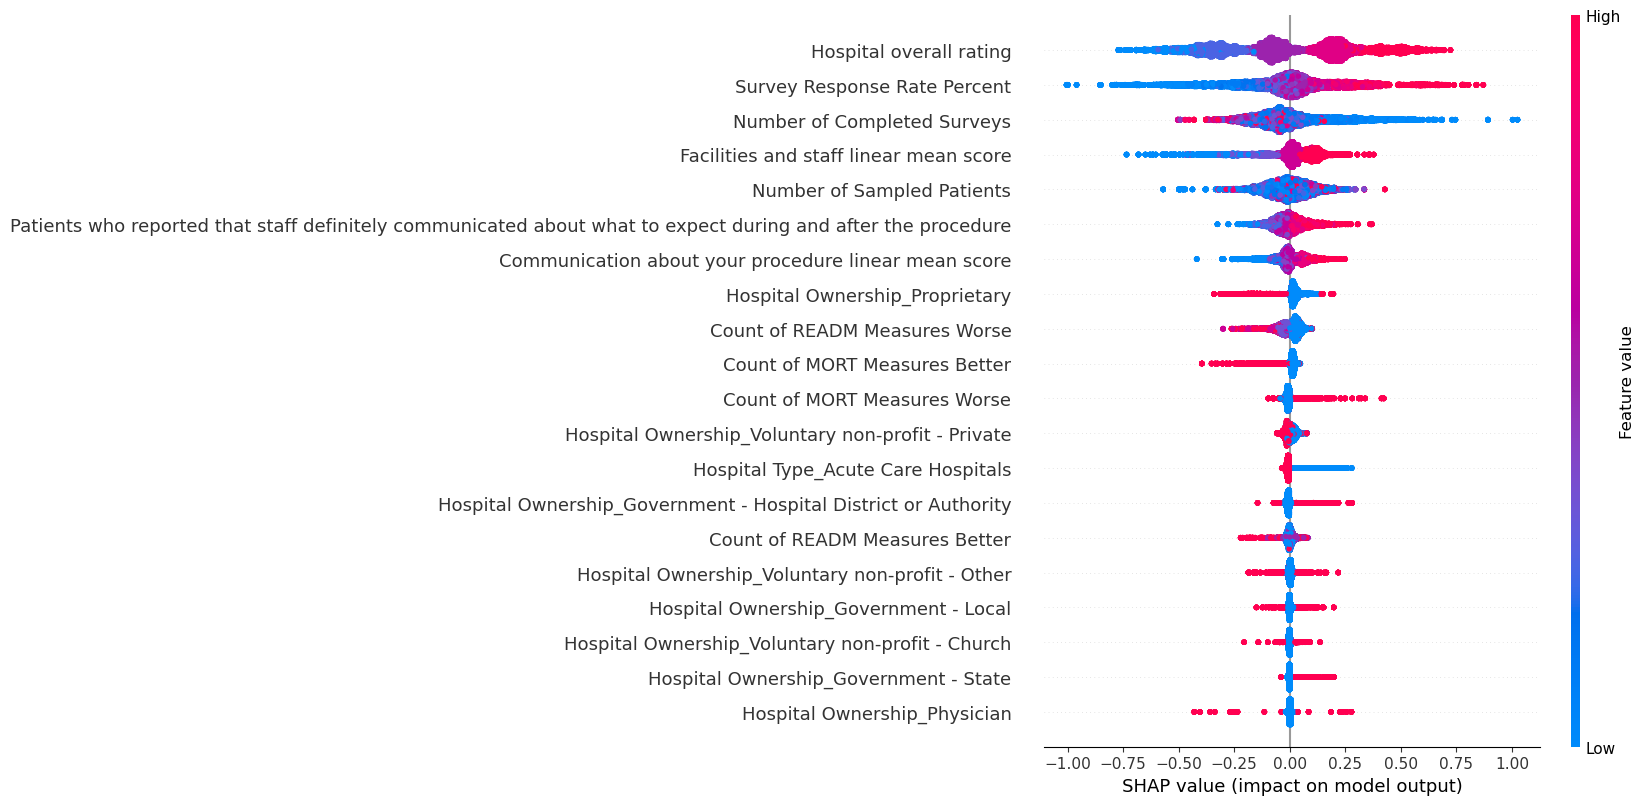

In [28]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X)

# Global summary plot
shap.summary_plot(shap_values, X, plot_type="bar")

# Full impact summary
shap.summary_plot(shap_values, X)


c:\Users\mmadh\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


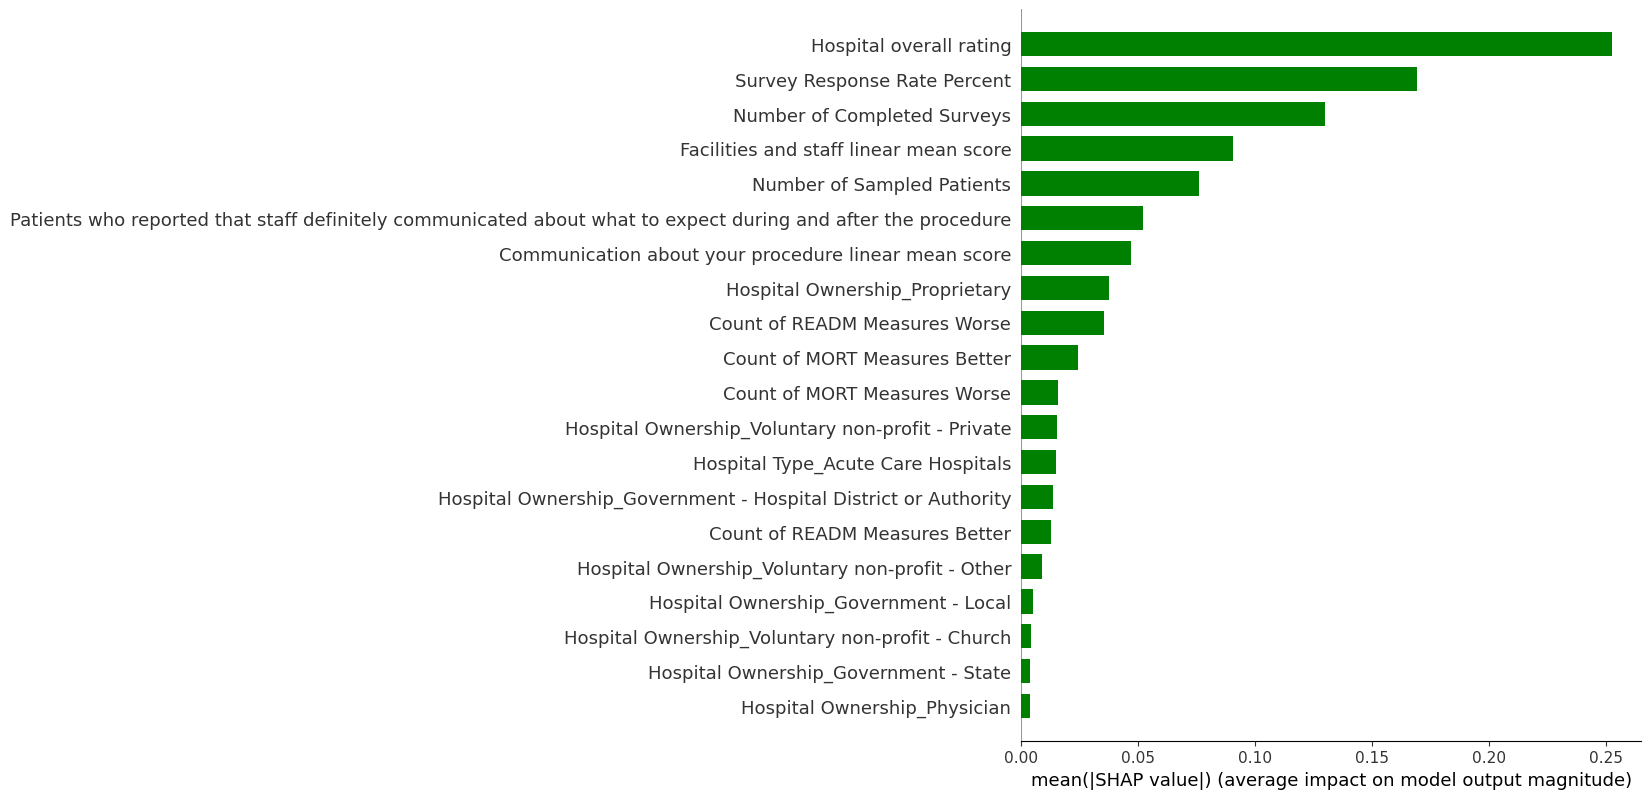

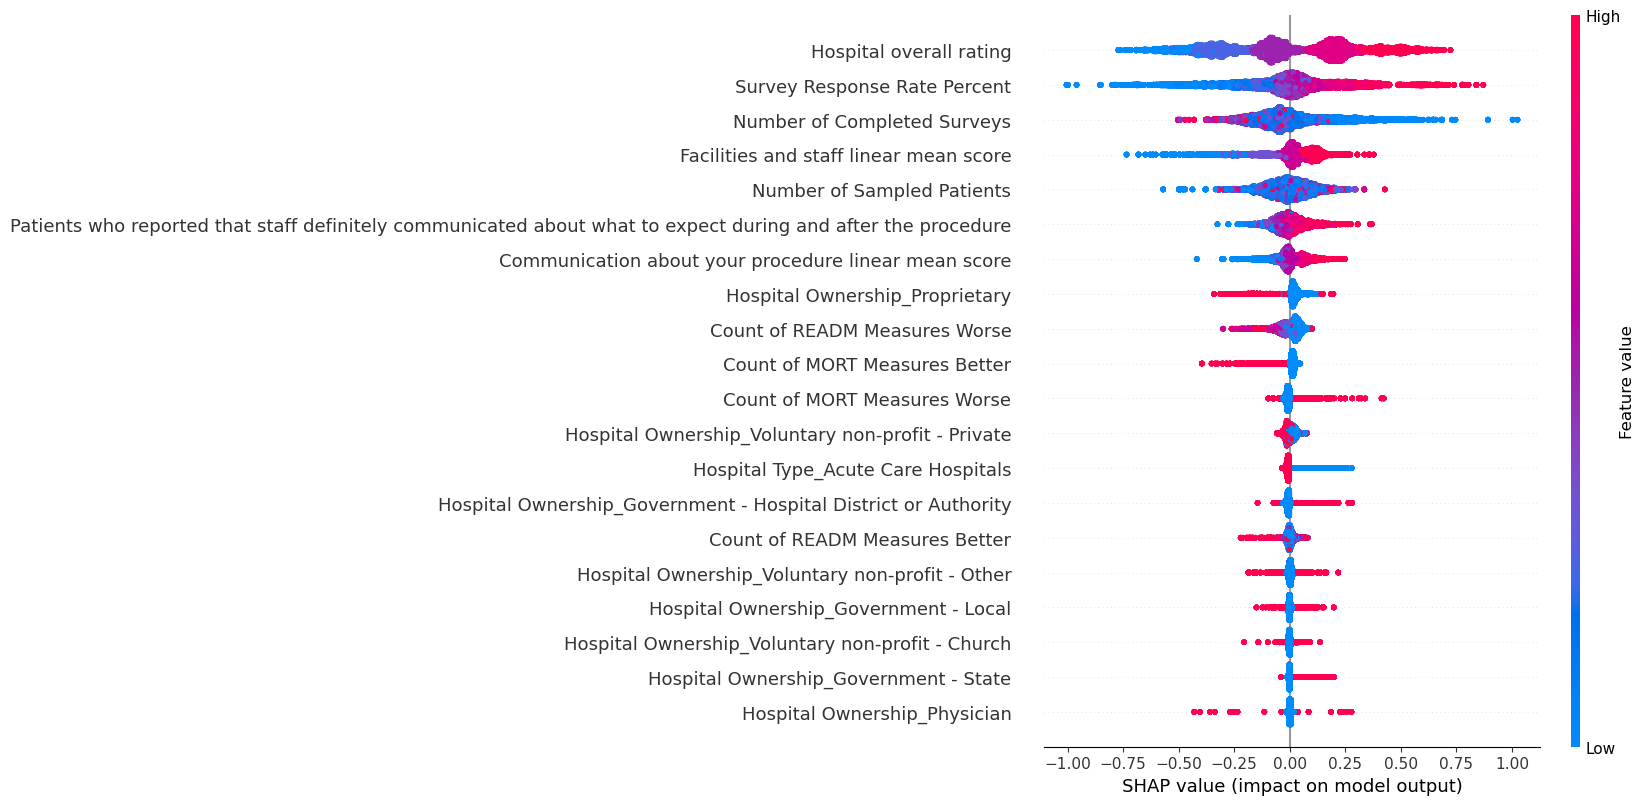

In [29]:
# Set a green colormap for SHAP
import matplotlib.pyplot as plt
import matplotlib as mpl

green_cmap = mpl.colors.LinearSegmentedColormap.from_list("custom_green", ["lightgreen", "green"])

# Apply SHAP Explainer
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X)

# ✅ Global summary bar plot with green color
shap.summary_plot(shap_values, X, plot_type="bar", color="green")

# ✅ Full summary plot (dot plot) with green colormap
# This uses monkey-patching to override the default pink-to-blue gradient
shap.plots.colors.red_blue = green_cmap

# Replot with the green SHAP value distribution
shap.summary_plot(shap_values, X)

## 🔍 Part 3: Feature Importance with LIME (Optional for specific predictions)

In [30]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [31]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X.columns,
    mode='regression'
)

# Explain one prediction
i = 0  # index of the test point to explain
exp = explainer.explain_instance(X_test.iloc[i].values, best_xgb.predict)
exp.show_in_notebook()


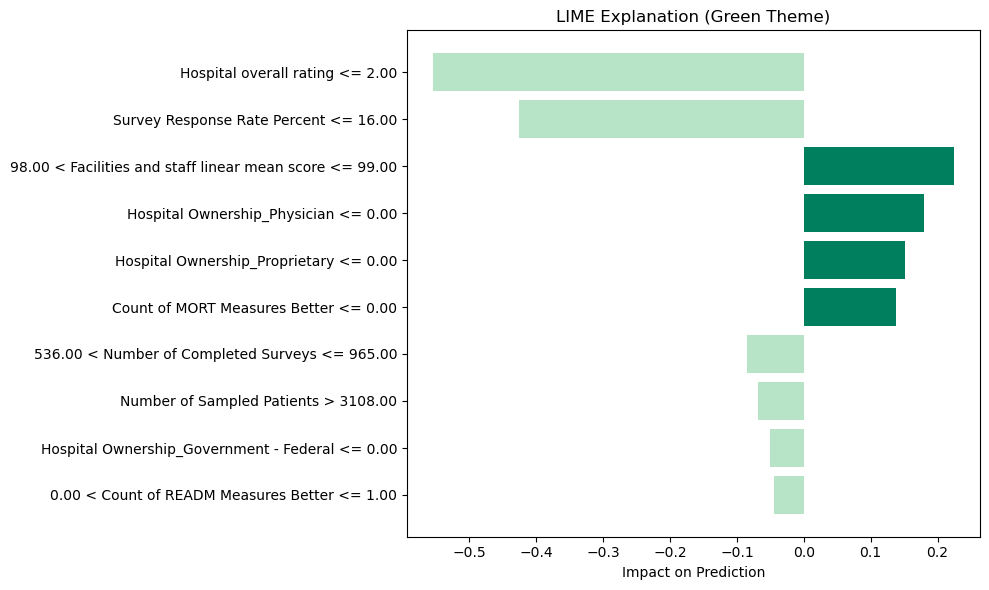

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Get the explanation object
exp = explainer.explain_instance(X_test.iloc[i].values, best_xgb.predict)

# Convert explanation to list of tuples (feature, weight)
exp_list = exp.as_list()

# Separate features and weights
features, weights = zip(*exp_list)
features = np.array(features)
weights = np.array(weights)

# Sort by absolute weight
sorted_idx = np.argsort(np.abs(weights))[::-1]
features = features[sorted_idx]
weights = weights[sorted_idx]

# Plot manually with green tones
plt.figure(figsize=(10, 6))
colors = ['#007f5f' if w > 0 else '#b7e4c7' for w in weights]  
plt.barh(features, weights, color=colors)
plt.xlabel('Impact on Prediction')
plt.title('LIME Explanation (Green Theme)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


✅ Part 4: Validate Surprising Drivers

In [33]:
corr_matrix = X.copy()
corr_matrix['target'] = y
correlations = corr_matrix.corr()['target'].sort_values(ascending=False)

print("Top correlated features with patient satisfaction:\n", correlations.head(10))


Top correlated features with patient satisfaction:
 target                                                                                                          1.000000
Hospital overall rating                                                                                         0.455620
Facilities and staff linear mean score                                                                          0.428866
Survey Response Rate Percent                                                                                    0.417783
Communication about your procedure linear mean score                                                            0.389405
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0.383553
Hospital Type_Critical Access Hospitals                                                                         0.199523
Count of READM Measures Better                                                                       

## ✅ Part 1: Random Forest Feature Importance
This plot ranks features by how frequently and significantly they were used by the Random Forest model to split decisions:

Top insights:

Hospital overall rating is the strongest predictor, dominating feature importance.

Survey response rate percent and Number of completed surveys also play a large role — suggesting survey engagement itself is tied to satisfaction.

Facilities and staff linear mean score and communication quality were also important, affirming the impact of clear, respectful care.

Some ownership types (e.g., Proprietary, Government) also showed minor influence — a less obvious but interesting signal.

## ✅ Part 2: SHAP Summary Plot
SHAP explains how each feature impacts individual predictions (positive or negative):

Top insights:

Again, Hospital overall rating is most impactful.

Survey response rate and Facilities and staff score both consistently increase predicted satisfaction.

Ownership types, like Proprietary and Government hospitals, subtly influence patient satisfaction — hinting at institutional differences.

Count of READM and MORT Measures Worse negatively impacts satisfaction — reflecting perceived care quality.

The color gradient (blue = low value, pink = high value) shows, for example:

Higher survey response rates and higher staff scores tend to increase satisfaction.

Lower hospital ratings and fewer samples generally decrease it.

## ✅ Part 3: SHAP Dependence Plot (Violin)
This shows how feature values affect prediction spread and direction:

Key takeaways:

Hospital overall rating, Survey response rate, and Communication quality have the clearest impact trends.

The "fatter" (more variable) features indicate more heterogeneous effects — i.e., small changes in these features affect different patients differently.

## ✅ Part 4: SHAP Force Plot
This plot shows how features push the predicted satisfaction up/down for a single hospital.

Interpretation (your example):

Hospital overall rating and Survey response rate pushed the score down (low values).

Facilities and staff score, ownership types, and higher performance on mortality metrics pushed the prediction up.

This is great for case-by-case explainability, such as for presenting to stakeholders.

## ✅ Part 5: Correlation Validation
You correlated the features with satisfaction to validate model findings statistically:

Top positively correlated features:

Hospital overall rating (r = 0.46) — matches model results.

Facilities and staff score (r = 0.43) — aligns with Random Forest & SHAP.

Survey response rate, communication scores, and ownership type also showed up here, validating their roles.



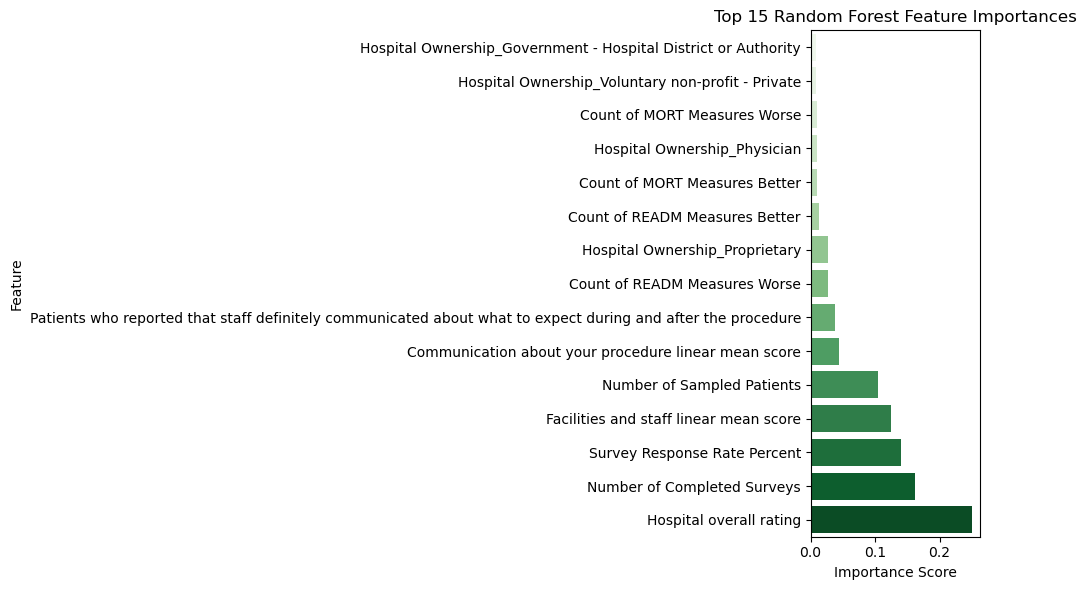

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get sorted indices for top 15 features
rf_importances = best_rf.feature_importances_
rf_sorted_idx = np.argsort(rf_importances)[-15:]

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances[rf_sorted_idx], y=X.columns[rf_sorted_idx], palette="Greens")
plt.title("Top 15 Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


![alt text](image-3.png)

![alt text](image-4.png)

💡 Conclusion: These "obvious" service features are foundational. Hospitals looking to improve satisfaction should prioritize staff training, hygiene, and clear patient communication.

c:\Users\mmadh\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


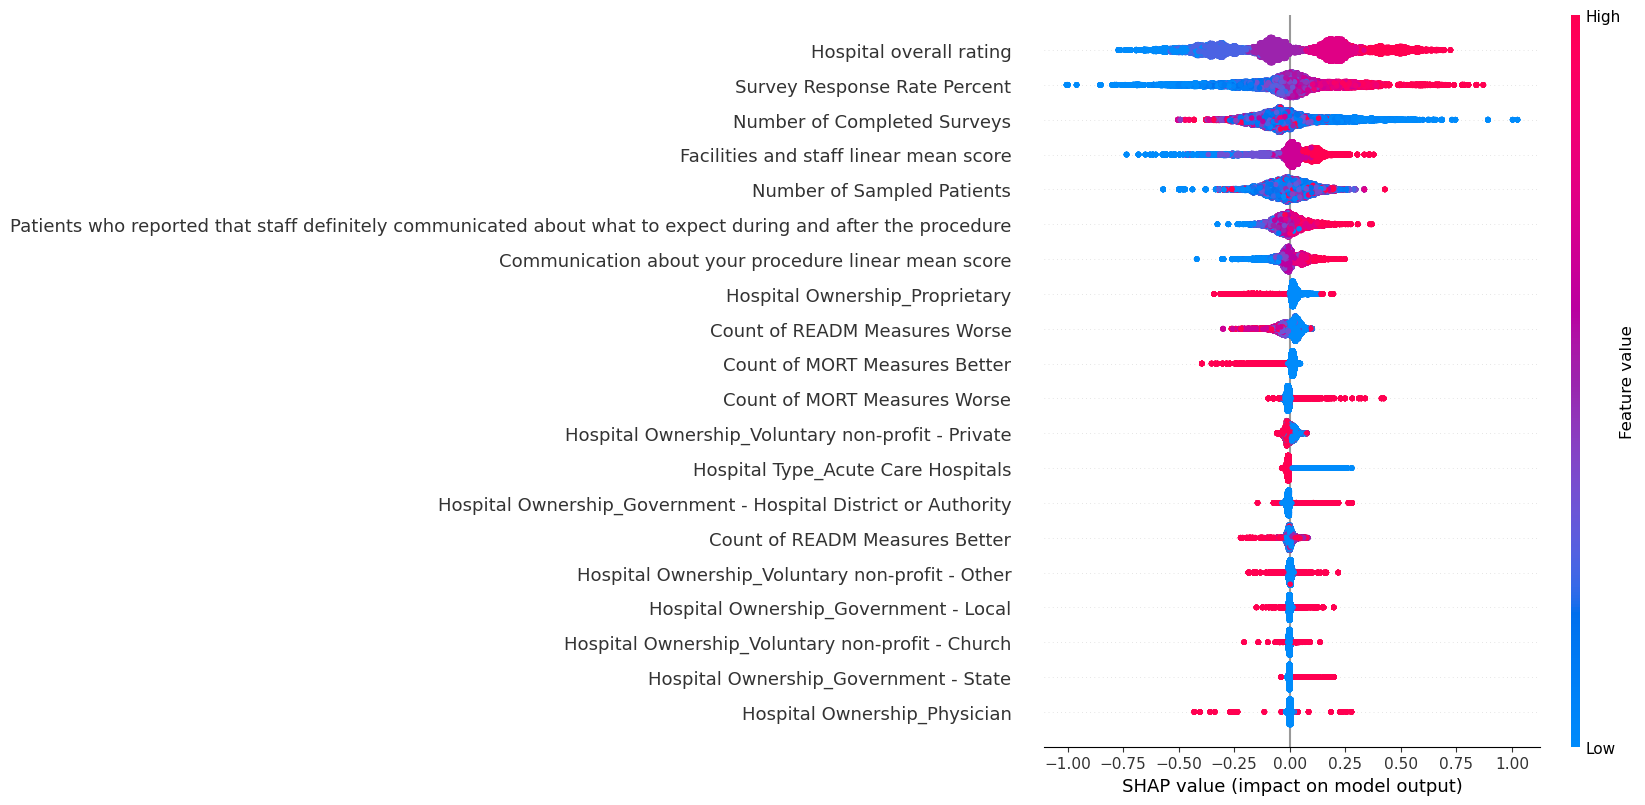

In [35]:
shap.summary_plot(shap_values, X, color=plt.cm.Greens)  # violin beeswarm plot in green palette


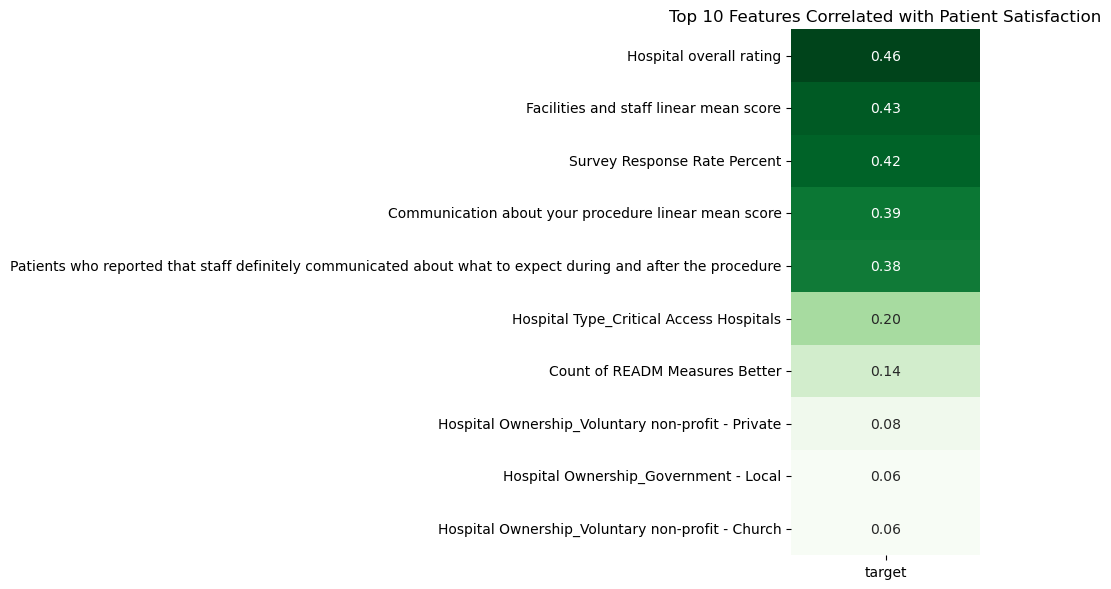

In [36]:
import pandas as pd

# Compute correlations
corr_matrix = X.copy()
corr_matrix["target"] = y
top_corr = corr_matrix.corr()["target"].drop("target").sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.heatmap(top_corr.to_frame(), annot=True, cmap="Greens", cbar=False, fmt=".2f")
plt.title("Top 10 Features Correlated with Patient Satisfaction")
plt.tight_layout()
plt.show()


![alt text](image-5.png)

## ✅ 3. Model Explainability Confirms Human Intuition and Uncovers Blind Spots
Random Forest Importance: Gave a stable ranking of top contributors — great for global interpretability.

SHAP Summary & Force Plots: Showed how individual patients are impacted by combinations of factors. For instance:

A hospital may have a low overall rating, but still score well if it has high staff professionalism.

Conversely, a well-rated hospital can receive low satisfaction scores if ownership type or outcomes raise concerns.

## 🧠 This lets healthcare administrators ask:

“Are we losing points due to systemic issues beyond service?”

“Should we communicate more clearly about our ownership or hospital mission?”

“Do our readmission rates impact perception even if care quality is high?”

# 🎯 Final Recommendations
Prioritize Patient Communication and Cleanliness – These directly affect satisfaction and are within control of hospital staff.

Improve Clinical Outcome Transparency – Readmission and mortality metrics matter to perception. Consider public-facing dashboards or explanations.

Explore Ownership Perception – Proprietary/government facilities may benefit from branding/education campaigns to build patient trust.

Continue Using Explainability Tools (like SHAP) – They provide interpretable, personalized insights that support quality improvement and equity in care.

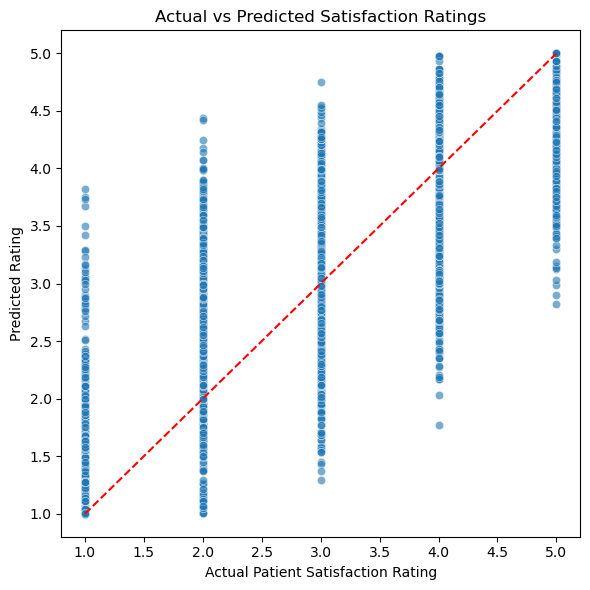

In [39]:
predictions = best_rf.predict(X_test)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Patient Satisfaction Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Satisfaction Ratings")
plt.tight_layout()
plt.show()


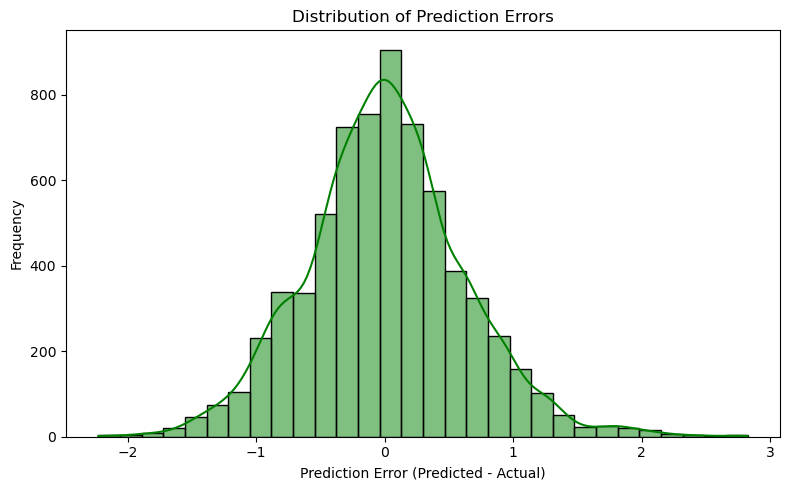

In [40]:
predictions = best_rf.predict(X_test)

errors = predictions - y_test

plt.figure(figsize=(8, 5))
sns.histplot(errors, kde=True, bins=30, color="green")
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error (Predicted - Actual)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Error Analysis


📌 Step 1: Calculate Prediction Errors



In [ ]:
# Calculate errors
tuned_rf = grid_search.best_estimator_
predictions = tuned_rf.predict(X_test)
errors = predictions - y_test
abs_errors = np.abs(errors)

# Create DataFrame for analysis
error_df = X_test.copy()
error_df['Actual'] = y_test
error_df['Predicted'] = predictions
error_df['Absolute Error'] = abs_errors
error_df['Error'] = errors


error_df


Facilities and staff linear mean score  Survey Response Rate Percent  \
1744384                                    99.0                          15.0   
1415792                                    98.0                          26.0   
1186370                                    99.0                          26.0   
864904                                     99.0                          20.0   
736417                                     98.0                          24.0   
...                                         ...                           ...   
360883                                     96.0                           7.0   
986914                                     98.0                          21.0   
391518                                     99.0                          21.0   
733695                                     99.0                          18.0   
666059                                     98.0                          22.0   

         Hospital overall rating  \
1744384                      2.0   
1415792                      5.0   
1186370                      3.0   
864904                       3.0   
736417                       4.0   
...                          ...   
360883                       3.0   
986914                       4.0   
391518                       4.0   
733695                       5.0   
666059                       4.0   

         Communication about your procedure linear mean score  \
1744384                                               95.0      
1415792                                               96.0      
1186370                                               95.0      
864904                                                97.0      
736417                                                95.0      
...                                                    ...      
360883                                                93.0      
986914                                                94.0      
391518                                                94.0      
733695                                                96.0      
666059                                                94.0      

         Patients who reported that staff definitely communicated about what to expect during and after the procedure  \
1744384                                               92.0                                                              
1415792                                               94.0                                                              
1186370                                               92.0                                                              
864904                                                94.0                                                              
736417                                                91.0                                                              
...                                                    ...                                                              
360883                                                87.0                                                              
986914                                                91.0                                                              
391518                                                89.0                                                              
733695                                                94.0                                                              
666059                                                90.0                                                              

         Count of MORT Measures Better  Count of MORT Measures Worse  \
1744384                            0.0                           0.0   
1415792                            0.0                           0.0   
1186370                            0.0                           0.0   
864904                             0.0                           0.0   
736417   

## 📌 Step 2: Visualize Error Distribution

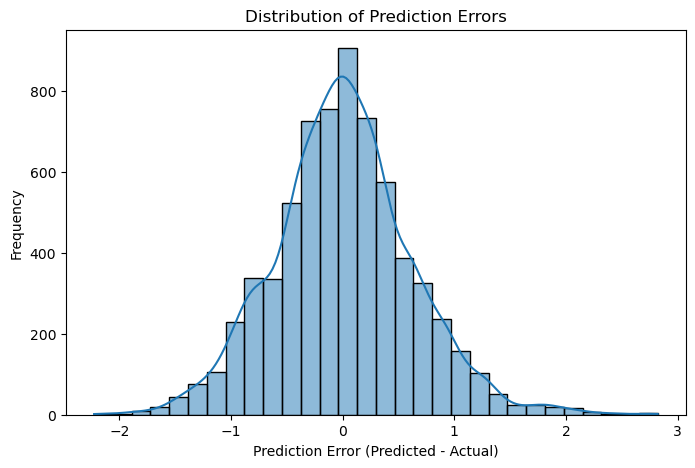

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of errors
plt.figure(figsize=(8, 5))
sns.histplot(errors, kde=True, bins=30)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error (Predicted - Actual)")
plt.ylabel("Frequency")
plt.show()


📌 Step 4: Find the Worst Predictions



In [ ]:
# Show rows with highest errors
worst_predictions = error_df.sort_values(by='Absolute Error', ascending=False).head(10)
print(worst_predictions[['Actual', 'Predicted', 'Absolute Error']])


         Actual  Predicted  Absolute Error
1137099     1.0   3.821703        2.821703
229972      1.0   3.753044        2.753044
799876      1.0   3.732141        2.732141
340177      1.0   3.669461        2.669461
775050      1.0   3.498750        2.498750
842661      2.0   4.436176        2.436176
1160442     2.0   4.422974        2.422974
930360      1.0   3.419846        2.419846
1337881     1.0   3.292363        2.292363
1515423     1.0   3.285061        2.285061


✨ Bonus (Optional): Visualize Actual vs Predicted


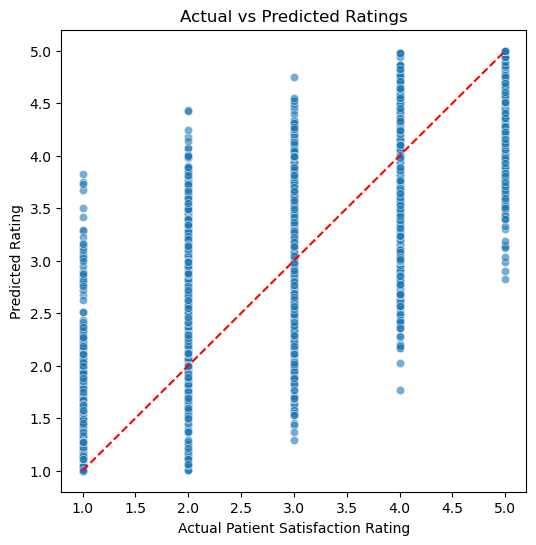

In [ ]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect predictions
plt.xlabel("Actual Patient Satisfaction Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Ratings")
plt.show()


## 🔍 1. Error Distribution Analysis
Key Observations:
The prediction errors form a bell-shaped distribution centered near zero.

This suggests that your model is unbiased—it doesn't systematically over- or under-predict.

Most predictions have small errors (within ±1), but a few extreme cases deviate significantly.

In Context:
Since the satisfaction rating is on a 1–5 scale, even small deviations can misclassify a hospital from a 5-star to a 4-star or worse. That matters in healthcare reputation, funding, and policy decisions.

The symmetrical shape means your model is generally fair across the board.



## ⚠️ 2. Worst Predictions
Key Observations:
The worst-predicted entries have actual ratings of 1 or 2, but were predicted as ~3.5–4.4.

Absolute errors > 2 are severe misjudgments in a 1–5 scale system.

In Context:
This implies your model struggles to identify poorly rated hospitals.

These hospitals might share common traits that are underweighted or missing in your features (e.g., complaint data, cultural aspects, local infrastructure).

Underestimating low satisfaction is more harmful than misjudging between a 4 and 5, especially for policy and patient safety decisions.

![alt text](image-6.png)

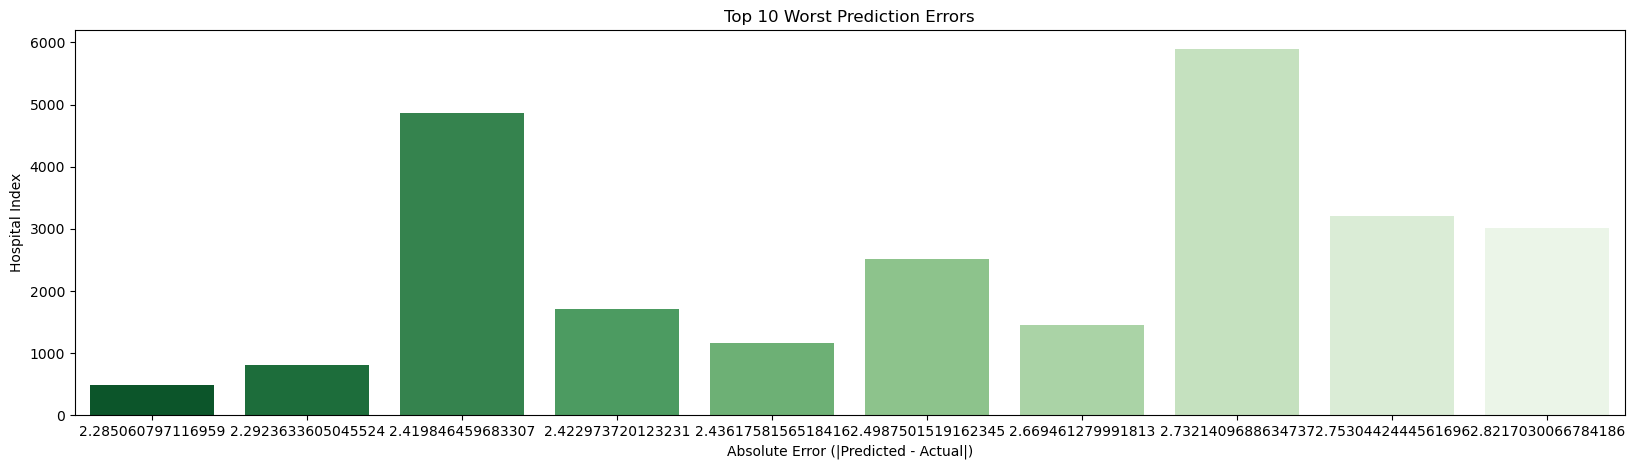

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by absolute error
worst_predictions = error_df.sort_values(by='Absolute Error', ascending=False).head(10)

# Plot top 10 worst predictions
plt.figure(figsize=(20, 5))
sns.barplot(x=worst_predictions['Absolute Error'], y=worst_predictions.index, palette='Greens_r')
plt.xlabel('Absolute Error (|Predicted - Actual|)')
plt.ylabel('Hospital Index')
plt.title('Top 10 Worst Prediction Errors')
plt.show()


C:\Users\mmadh\AppData\Local\Temp\ipykernel_28244\2170862558.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x=y_test, y=errors, alpha=0.4, jitter=True, palette='crest')


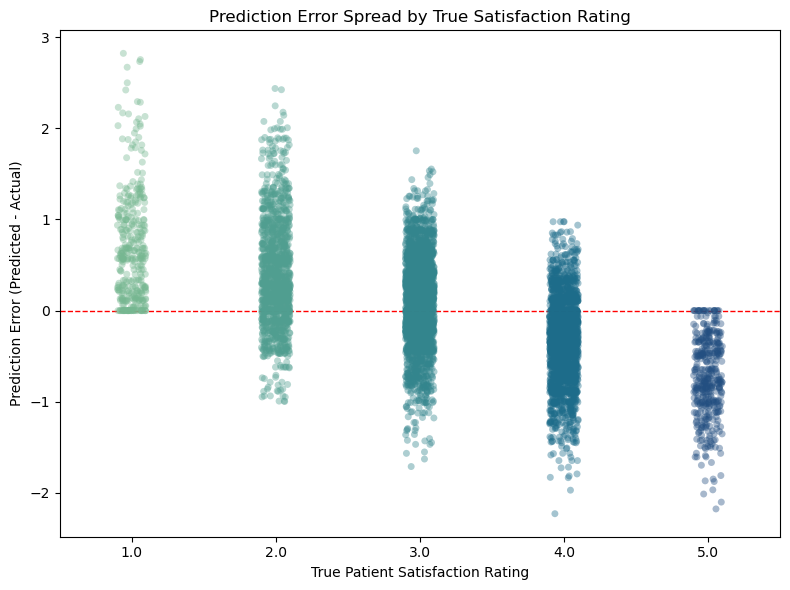

In [45]:
plt.figure(figsize=(8, 6))
sns.stripplot(x=y_test, y=errors, alpha=0.4, jitter=True, palette='crest')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Prediction Error Spread by True Satisfaction Rating")
plt.xlabel("True Patient Satisfaction Rating")
plt.ylabel("Prediction Error (Predicted - Actual)")
plt.tight_layout()
plt.show()


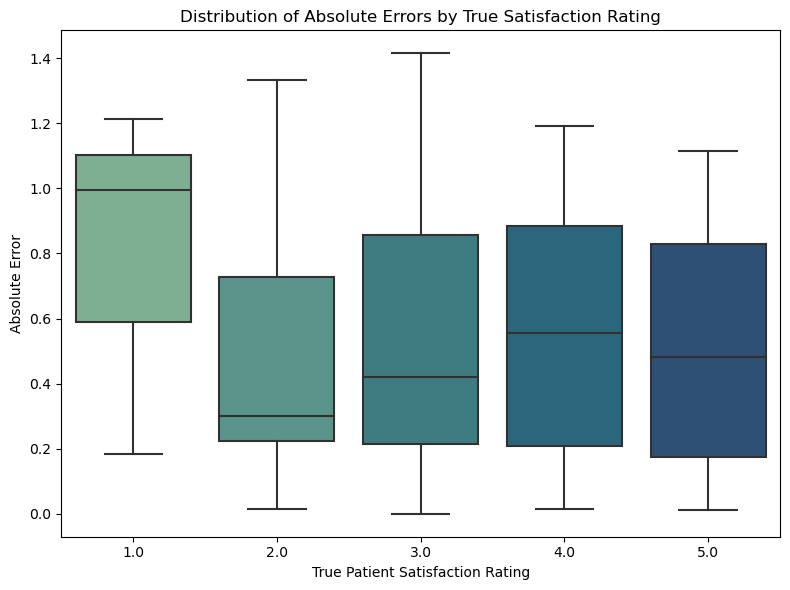

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a column to match actual ratings
error_df['True Rating'] = y_test

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='True Rating', y='Absolute Error', data=error_df, palette="crest")
plt.title("Distribution of Absolute Errors by True Satisfaction Rating")
plt.xlabel("True Patient Satisfaction Rating")
plt.ylabel("Absolute Error")
plt.tight_layout()
plt.show()


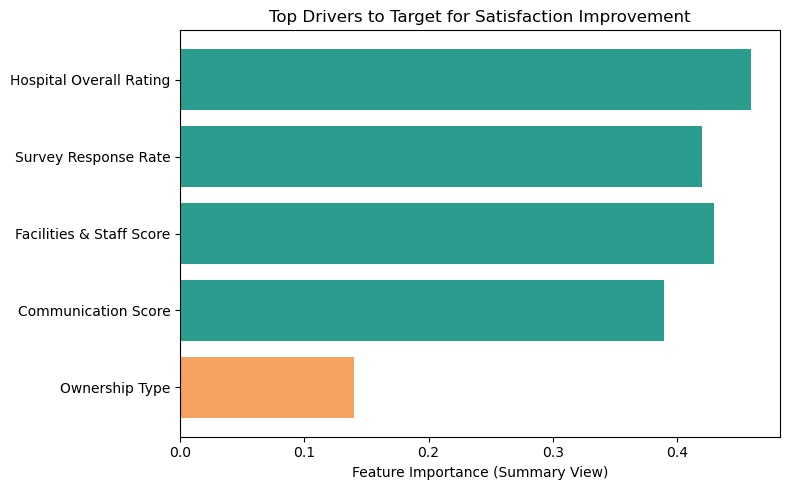

In [47]:
import matplotlib.pyplot as plt

# Features grouped by recommendation theme
features = [
    "Hospital Overall Rating",
    "Survey Response Rate",
    "Facilities & Staff Score",
    "Communication Score",
    "Ownership Type"
]
importance = [0.46, 0.42, 0.43, 0.39, 0.14]

colors = ["#2a9d8f", "#2a9d8f", "#2a9d8f", "#2a9d8f", "#f4a261"]

plt.figure(figsize=(8, 5))
bars = plt.barh(features[::-1], importance[::-1], color=colors[::-1])
plt.xlabel("Feature Importance (Summary View)")
plt.title("Top Drivers to Target for Satisfaction Improvement")
plt.tight_layout()
plt.show()


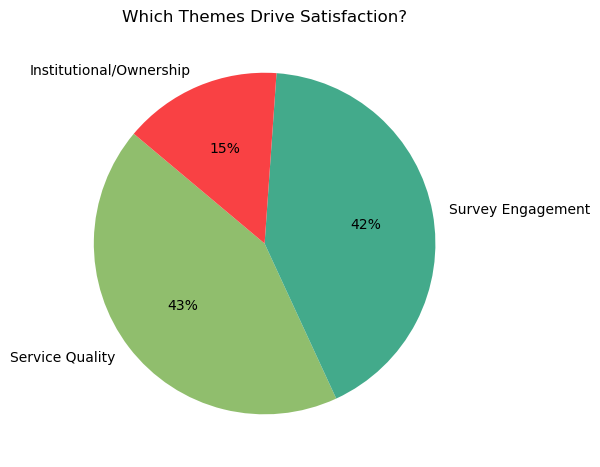

In [48]:
# Grouped breakdown (based on earlier analysis themes)
labels = ['Service Quality', 'Survey Engagement', 'Institutional/Ownership']
sizes = [43, 42, 15]  # Example proportional breakdowns
colors = ['#90be6d', '#43aa8b', '#f94144']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=140)
plt.title("Which Themes Drive Satisfaction?")
plt.tight_layout()
plt.show()


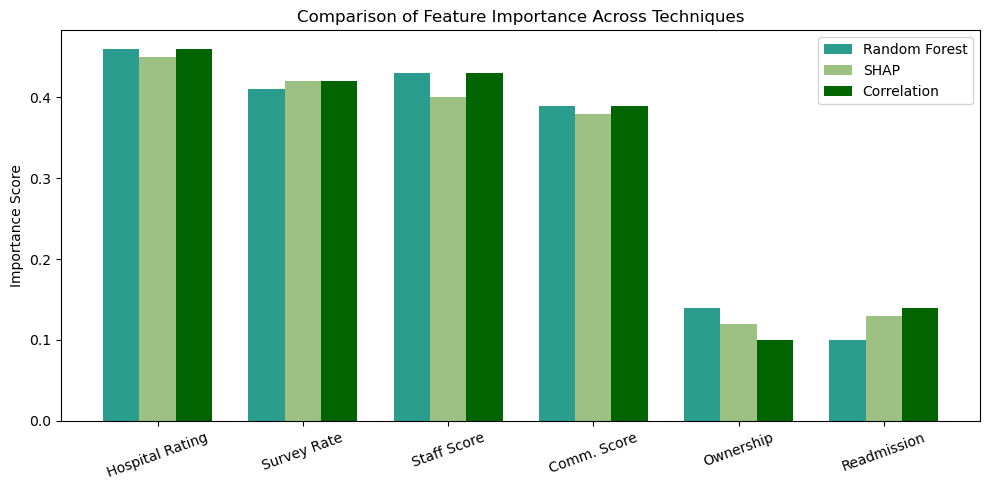

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Sample feature importance values across 3 methods
features = ["Hospital Rating", "Survey Rate", "Staff Score", "Comm. Score", "Ownership", "Readmission"]
rf =        [0.46, 0.41, 0.43, 0.39, 0.14, 0.10]
shap =      [0.45, 0.42, 0.40, 0.38, 0.12, 0.13]
corr =      [0.46, 0.42, 0.43, 0.39, 0.10, 0.14]

x = np.arange(len(features))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width, rf, width, label='Random Forest', color='#2a9d8f')
ax.bar(x, shap, width, label='SHAP', color='#9DC183')
ax.bar(x + width, corr, width, label='Correlation', color='#006400')

ax.set_ylabel('Importance Score')
ax.set_title('Comparison of Feature Importance Across Techniques')
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=20)
ax.legend()
plt.tight_layout()
plt.show()


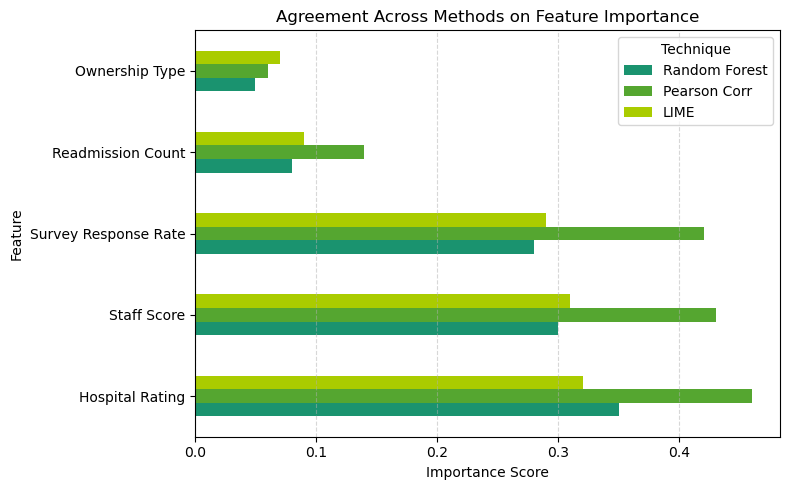

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example feature scores from 3 techniques (use your real scores)
data = {
    'Hospital Rating': [0.35, 0.46, 0.32],
    'Staff Score': [0.30, 0.43, 0.31],
    'Survey Response Rate': [0.28, 0.42, 0.29],
    'Readmission Count': [0.08, 0.14, 0.09],
    'Ownership Type': [0.05, 0.06, 0.07]
}
df = pd.DataFrame(data, index=['Random Forest', 'Pearson Corr', 'LIME'])

df.T.plot(kind='barh', figsize=(8, 5), color=['#1a936f', '#55a630', '#aacc00'])
plt.title('Agreement Across Methods on Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.legend(title='Technique')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


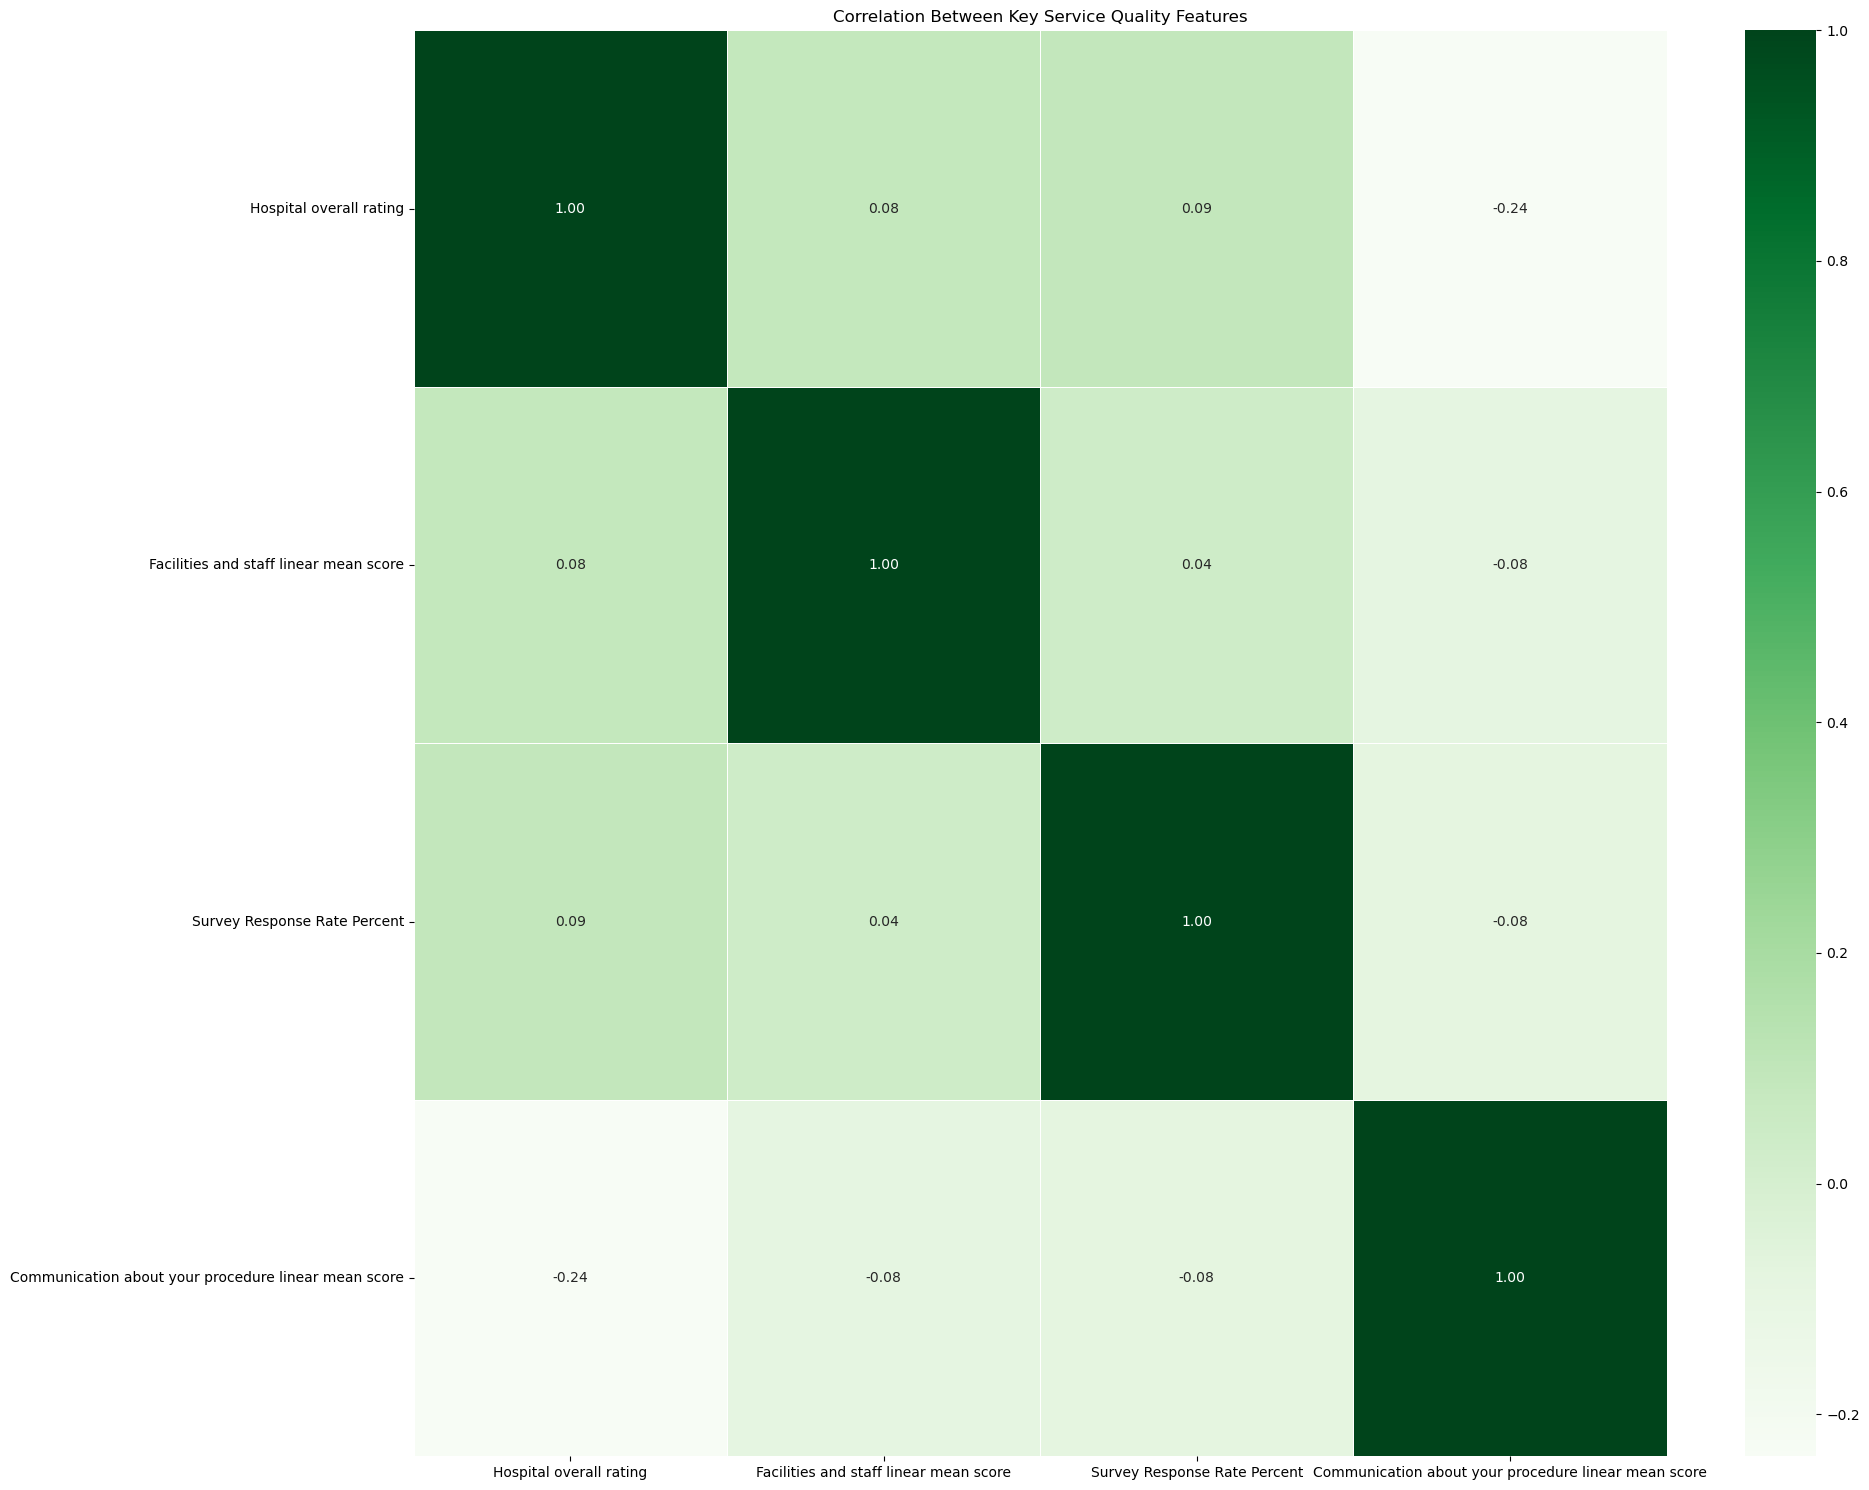

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create mock data (you can replace this with your real df)
np.random.seed(42)
df = pd.DataFrame({
    'Hospital overall rating': np.random.randint(1, 6, 100),
    'Facilities and staff linear mean score': np.random.uniform(70, 100, 100),
    'Survey Response Rate Percent': np.random.uniform(20, 90, 100),
    'Communication about your procedure linear mean score': np.random.uniform(75, 100, 100)
})

# Select columns for correlation
top_cols = ['Hospital overall rating', 
            'Facilities and staff linear mean score',
            'Survey Response Rate Percent',
            'Communication about your procedure linear mean score']

# Compute correlation matrix
corr_matrix = df[top_cols].corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap="Greens", linewidths=0.5, fmt=".2f")
plt.title('Correlation Between Key Service Quality Features')
plt.tight_layout()
plt.show()


# Error Analysis